# Sanity check

In [1]:
import sklearn.datasets
import src.utils as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

### Iris dataset and k-means

In [2]:
iris = sklearn.datasets.load_iris()
scaler = StandardScaler()
X = iris["data"]
X = scaler.fit_transform(X)
y_true = iris["target"]


In [3]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

Silhouette Score (from classes): 0.3811
Silhouette Score (from clusters): 0.4594
Davies-Bouldin Index (from classes): 1.0673
Davies-Bouldin Index (from clusters): 0.8340
Rand Index: 0.8278
Purity score: 0.8266666666666667


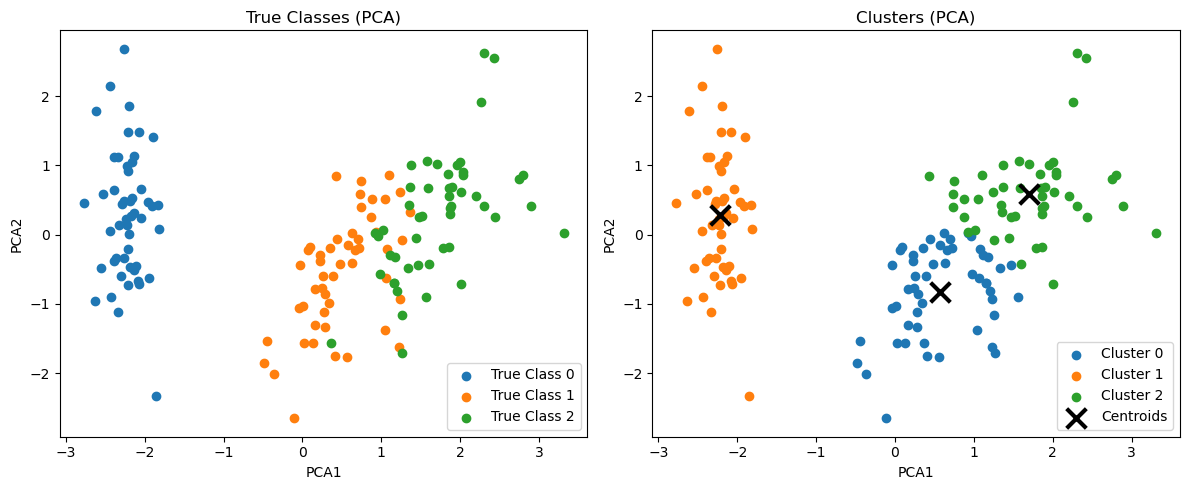

In [4]:
metrics = utils.calculate_clustering_metrics(X, y_true, y_pred)
utils.print_clustering_metrics(metrics)
utils.plot_clustering(X, y_true, y_pred, kmeans.cluster_centers_)

### Iris dataset and DBSCAN

In [23]:
dbscan = DBSCAN(eps = 0.5, min_samples=4)
y_pred = dbscan.fit_predict(X)

In [6]:
metrics = utils.calculate_clustering_metrics(X, y_true, y_pred)
utils.print_clustering_metrics(metrics)

Silhouette Score (from classes): 0.3811
Silhouette Score (from clusters): 0.3565
Davies-Bouldin Index (from classes): 1.0673
Davies-Bouldin Index (from clusters): 7.1241
Rand Index: 0.7476
Purity score: 0.68


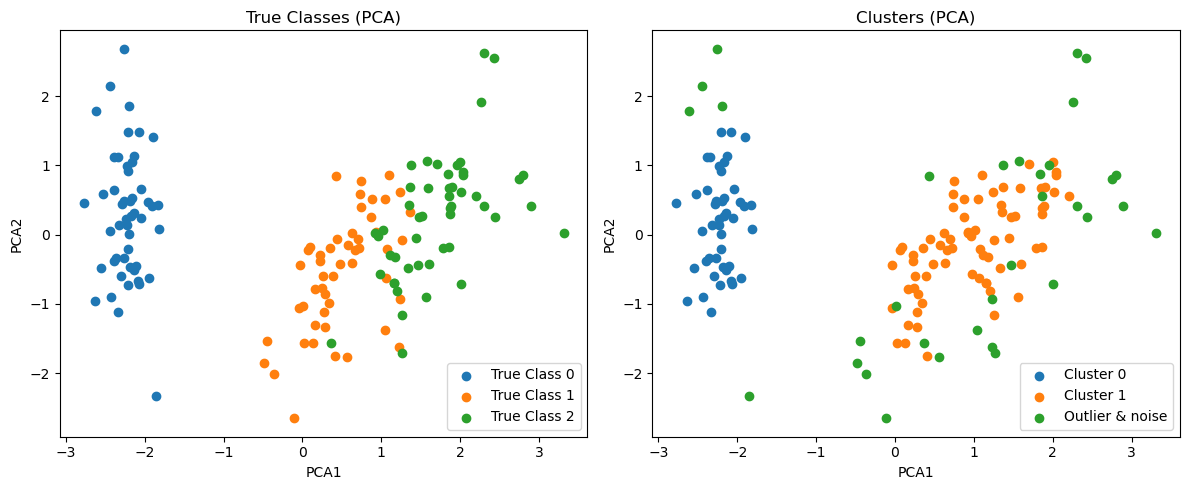

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


In [24]:
utils.plot_clustering(X, y_true, y_pred, None)
print(y_pred)

### Create metrics
F1-score, recall, precision and accuracy on test set

### Visualize

In [8]:
utils.plot_tree(dtc, iris.feature_names, iris.target_names)

AttributeError: module 'src.utils' has no attribute 'plot_tree'

### Cross-validation
With mean metrics across all folds 

In [ ]:
dtc_cv = DecisionTreeClassifier()
results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=2)
utils.print_metrics(results)

------------------------------
Overall Results
------------------------------
Accuracy: 0.9000
Macro Precision: 0.9062
Macro Recall: 0.9023
Macro F1 Score: 0.8996


In [ ]:
results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=5)
utils.print_metrics(results)

------------------------------
Overall Results
------------------------------
Accuracy: 0.9250
Macro Precision: 0.9295
Macro Recall: 0.9304
Macro F1 Score: 0.9197


In [ ]:
results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=10)
utils.print_metrics(results)

------------------------------
Overall Results
------------------------------
Accuracy: 0.9250
Macro Precision: 0.9156
Macro Recall: 0.9322
Macro F1 Score: 0.9130


## Wine

In [ ]:
wine = sklearn.datasets.load_wine()
X = wine["data"]
y = wine["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)

utils.calc_basic_metrics(y_test, predictions, wine)
metrics = utils.validate(y_test, predictions, wine.target_names)
utils.print_metrics(metrics)

__________________________________________________
Metrics for class_0:
TP: 11, TN: 24, FP: 0, FN: 1
Precision: 1.0000
Recall: 0.9167
__________________________________________________
Metrics for class_1:
TP: 11, TN: 19, FP: 3, FN: 3
Precision: 0.7857
Recall: 0.7857
__________________________________________________
Metrics for class_2:
TP: 8, TN: 23, FP: 3, FN: 2
Precision: 0.7273
Recall: 0.8000
------------------------------
Overall Results
------------------------------
Accuracy: 0.8333
Macro Precision: 0.8377
Macro Recall: 0.8341
Macro F1 Score: 0.8347


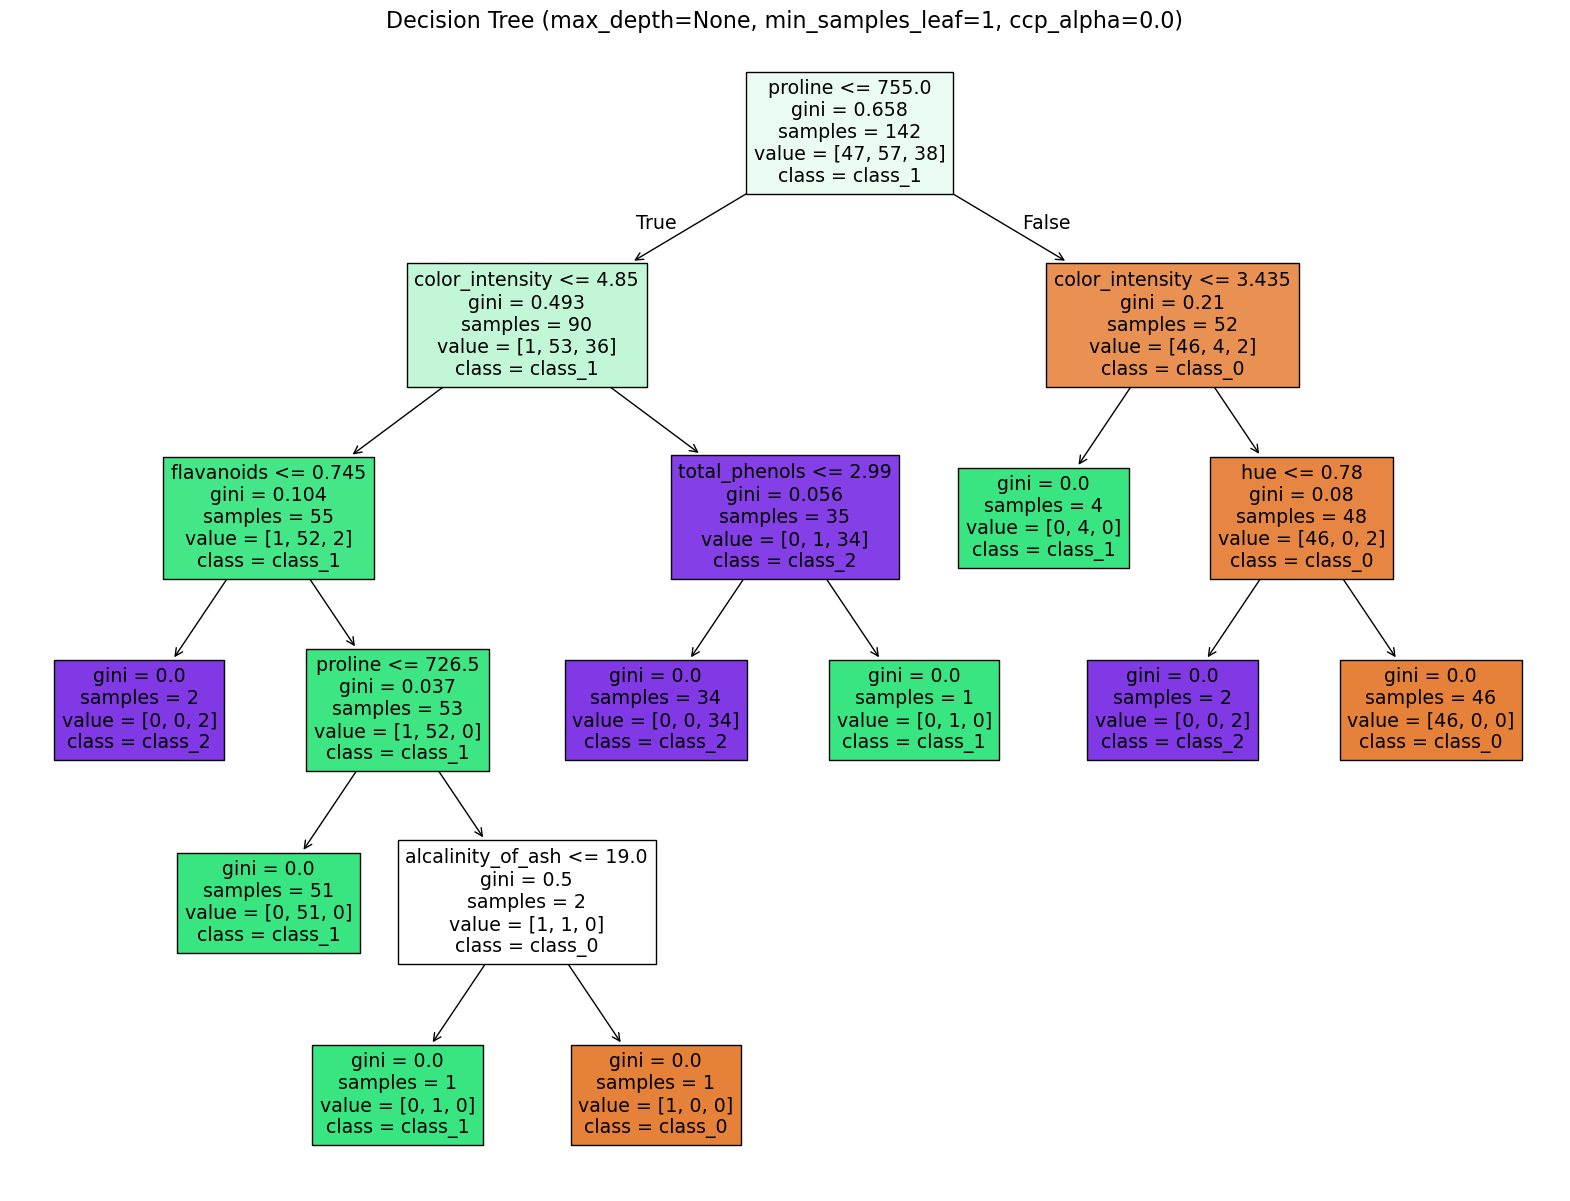

In [ ]:
utils.plot_tree(dtc, wine.feature_names, wine.target_names)

In [ ]:
dtc_cv = DecisionTreeClassifier()
results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=2)
utils.print_metrics(results)

results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=5)
utils.print_metrics(results)

results = utils.evaluate_model_cv(dtc_cv, X_train, y_train, n_splits=10)
utils.print_metrics(results)

------------------------------
Overall Results
------------------------------
Accuracy: 0.8662
Macro Precision: 0.8676
Macro Recall: 0.8672
Macro F1 Score: 0.8642
------------------------------
Overall Results
------------------------------
Accuracy: 0.9086
Macro Precision: 0.9249
Macro Recall: 0.9084
Macro F1 Score: 0.9065
------------------------------
Overall Results
------------------------------
Accuracy: 0.9000
Macro Precision: 0.9193
Macro Recall: 0.9042
Macro F1 Score: 0.8974


In [ ]:
pcb, X_train, X_test, y_train, y_test = utils.load_pcb()

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)

pcb.target_names = ["Not bankrupt", "Bankrupt"]

utils.calc_basic_metrics(y_test, predictions, pcb)
metrics = utils.validate(y_test, predictions, pcb.target_names)
utils.print_metrics(metrics)

__________________________________________________
Metrics for Not bankrupt:
TP: 1890, TN: 15, FP: 83, FN: 93
Precision: 0.9579
Recall: 0.9531
__________________________________________________
Metrics for Bankrupt:
TP: 15, TN: 1890, FP: 93, FN: 83
Precision: 0.1389
Recall: 0.1531
------------------------------
Overall Results
------------------------------
Accuracy: 0.9154
Macro Precision: 0.5484
Macro Recall: 0.5531
Macro F1 Score: 0.5506


/tmp/ipykernel_377062/7758940.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


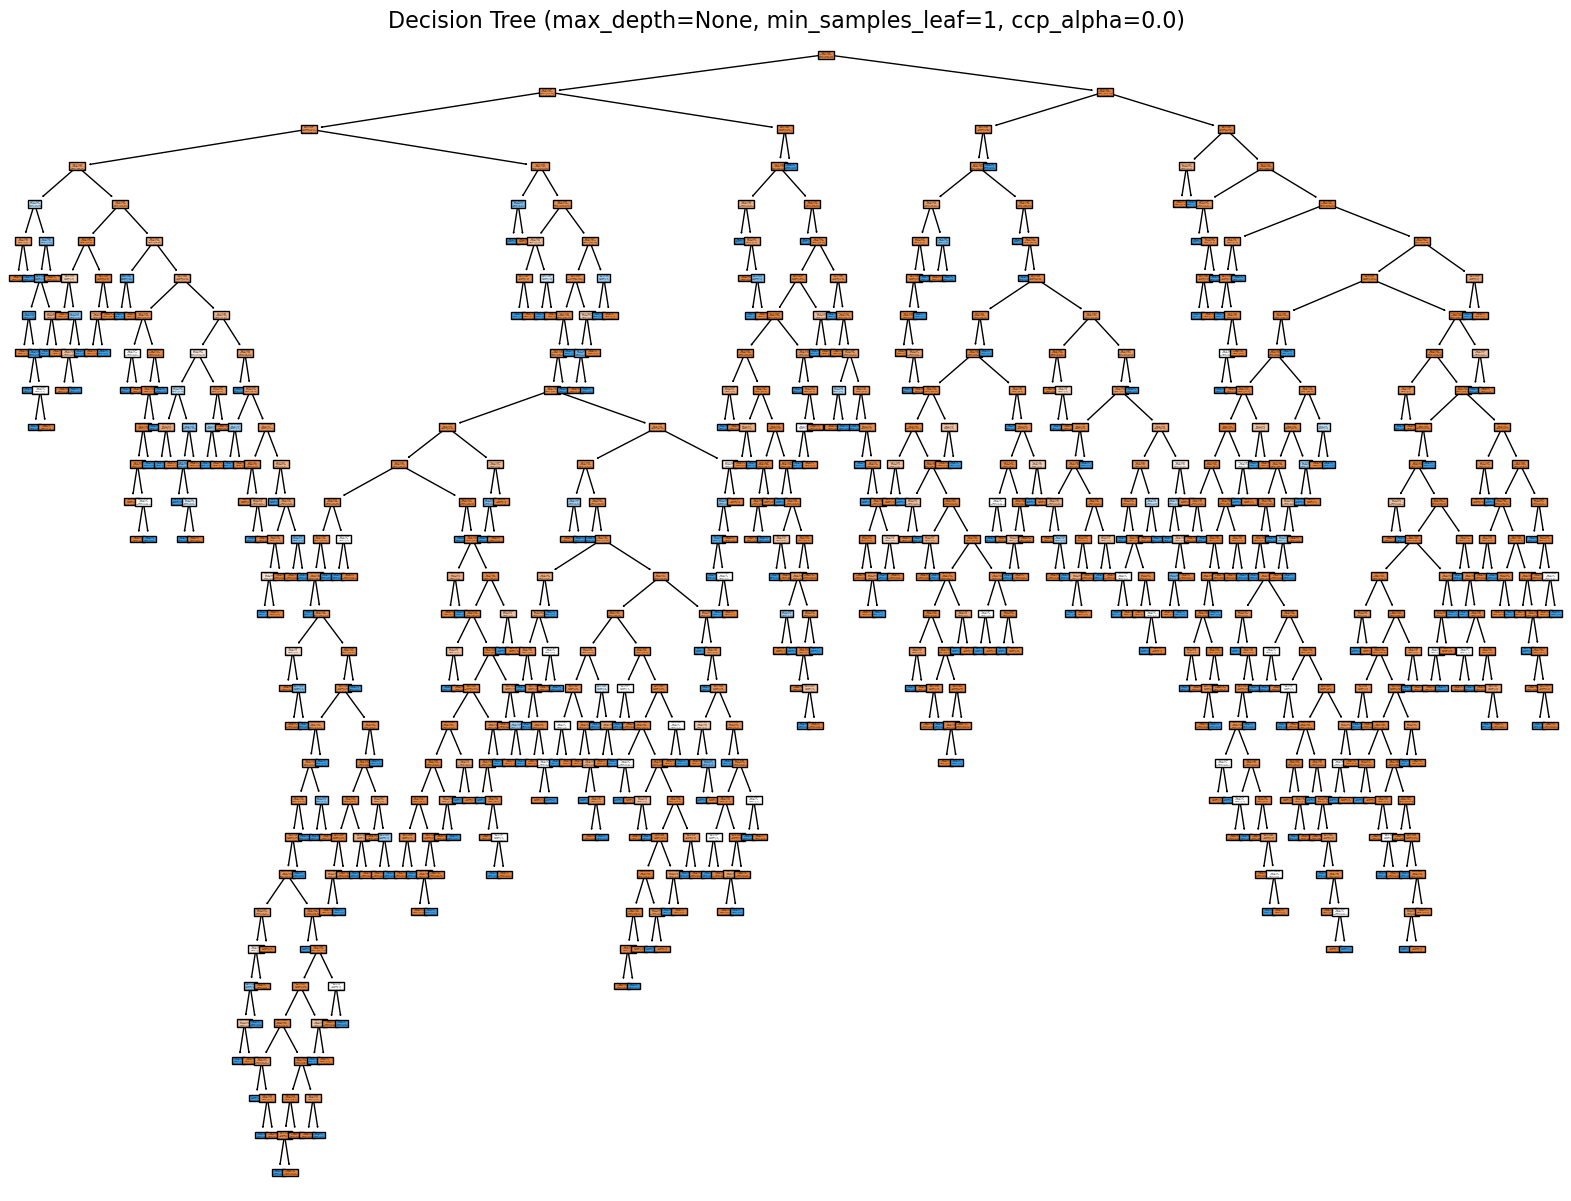

In [ ]:
utils.plot_tree(dtc, pcb.columns, pcb.target_names)

### Wnioski
 - Dla Iris i Wine datasetu domyślne wartości drzewa CART radzą sobie całkiem nieźle.
 - Domyślne parametry nie przeciwdziałają overfittingowi w żaden sposób (max_depth = None, min_samples_leaf = 1, cpp_alpha = 0)
 - Widać, że drzewa wytwarzają bardzo specyficzne podziały już po jednym/dwóch podziałach i rozdzielają 49 próbek jednej klasy z dwoma z dwóch pozostałych.

# Complex hyperparameters comparison

### Iris

In [ ]:
runs = utils.load_experiment_data("Test_iris")

Loaded 240 runs from experiment 'Test_iris'


In [ ]:
top_5_recall = runs.sort_values(by="metrics.recall", ascending=False).head(5)
print(top_5_recall[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_precision = runs.sort_values(by="metrics.precision", ascending=False).head(5)
print(top_5_precision[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_f1 = runs.sort_values(by="metrics.f1-score", ascending=False).head(5)
print(top_5_f1[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])
# "metrics.recall", "metrics.precision", "metrics.f1-score"

    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
29              0.01             gini                8                       2
189             0.01             gini                3                       1
186            0.025          entropy                3                       1
125             0.01             gini                4                       2
72              0.05          entropy                6                       2
    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
29              0.01             gini                8                       2
125             0.01             gini                4                       2
187            0.025             gini                3                       1
118            0.075          entropy                4                       2
170            0.025          entropy                3                       2
    params.cpp_alpha params.criterion params.max_dep

In [ ]:
runs = utils.load_experiment_data("Test_iris_specific")
runs["params.cpp_alpha"] = pd.to_numeric(runs["params.cpp_alpha"])
runs["params.min_samples_leaf"] = pd.to_numeric(runs["params.min_samples_leaf"])
runs["params.max_depth"] = pd.to_numeric(runs["params.max_depth"])

Loaded 44 runs from experiment 'Test_iris_specific'


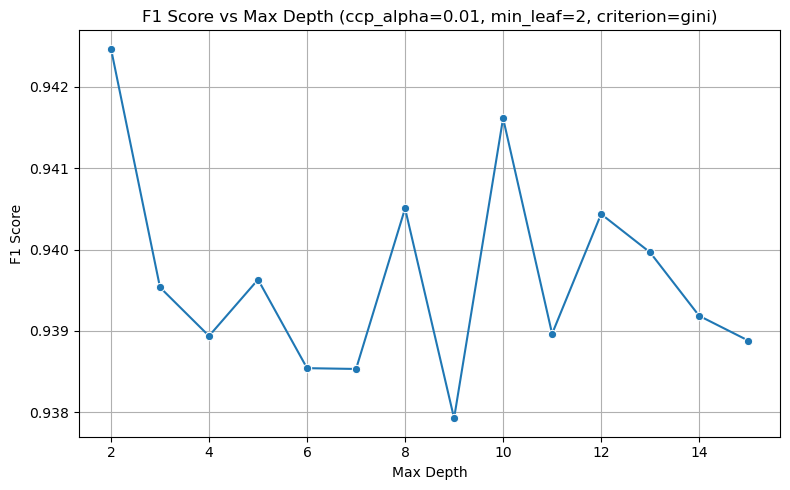

------------------------------
Overall Results
------------------------------
Accuracy: 0.9333
Macro Precision: 0.9333
Macro Recall: 0.9333
Macro F1 Score: 0.9333


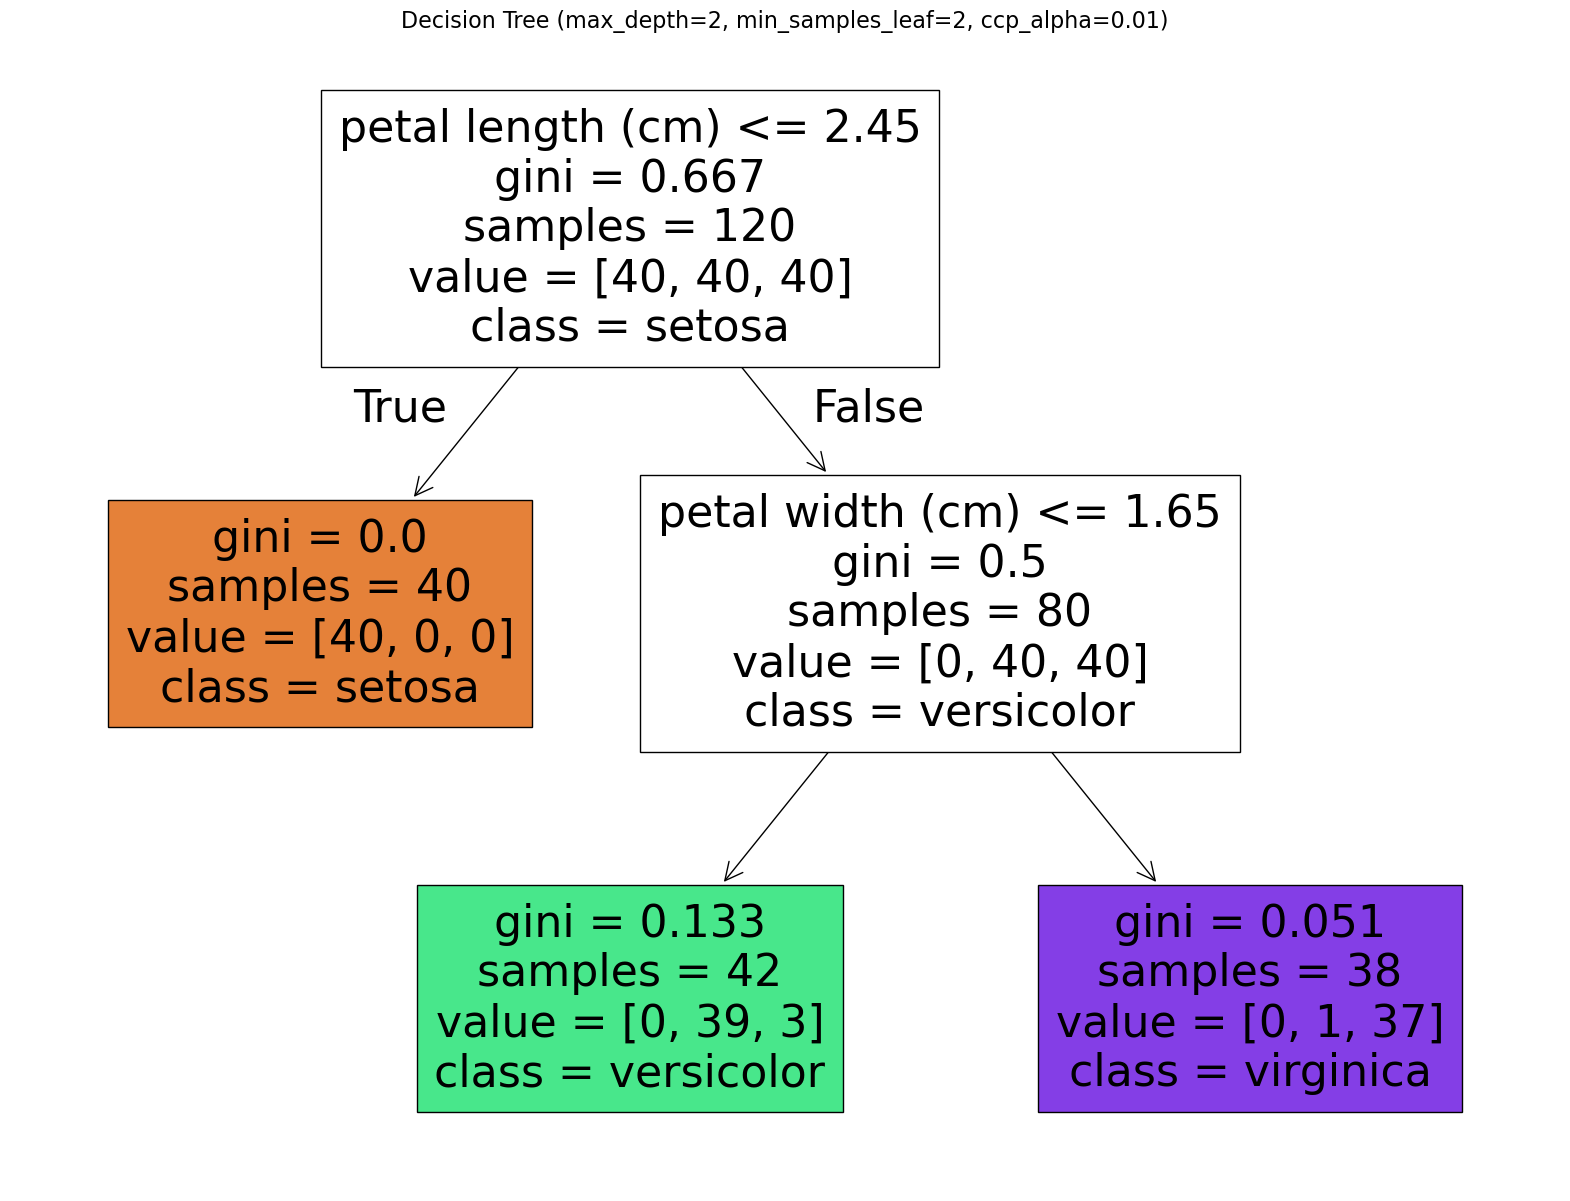

------------------------------
Overall Results
------------------------------
Accuracy: 0.9667
Macro Precision: 0.9697
Macro Recall: 0.9667
Macro F1 Score: 0.9666


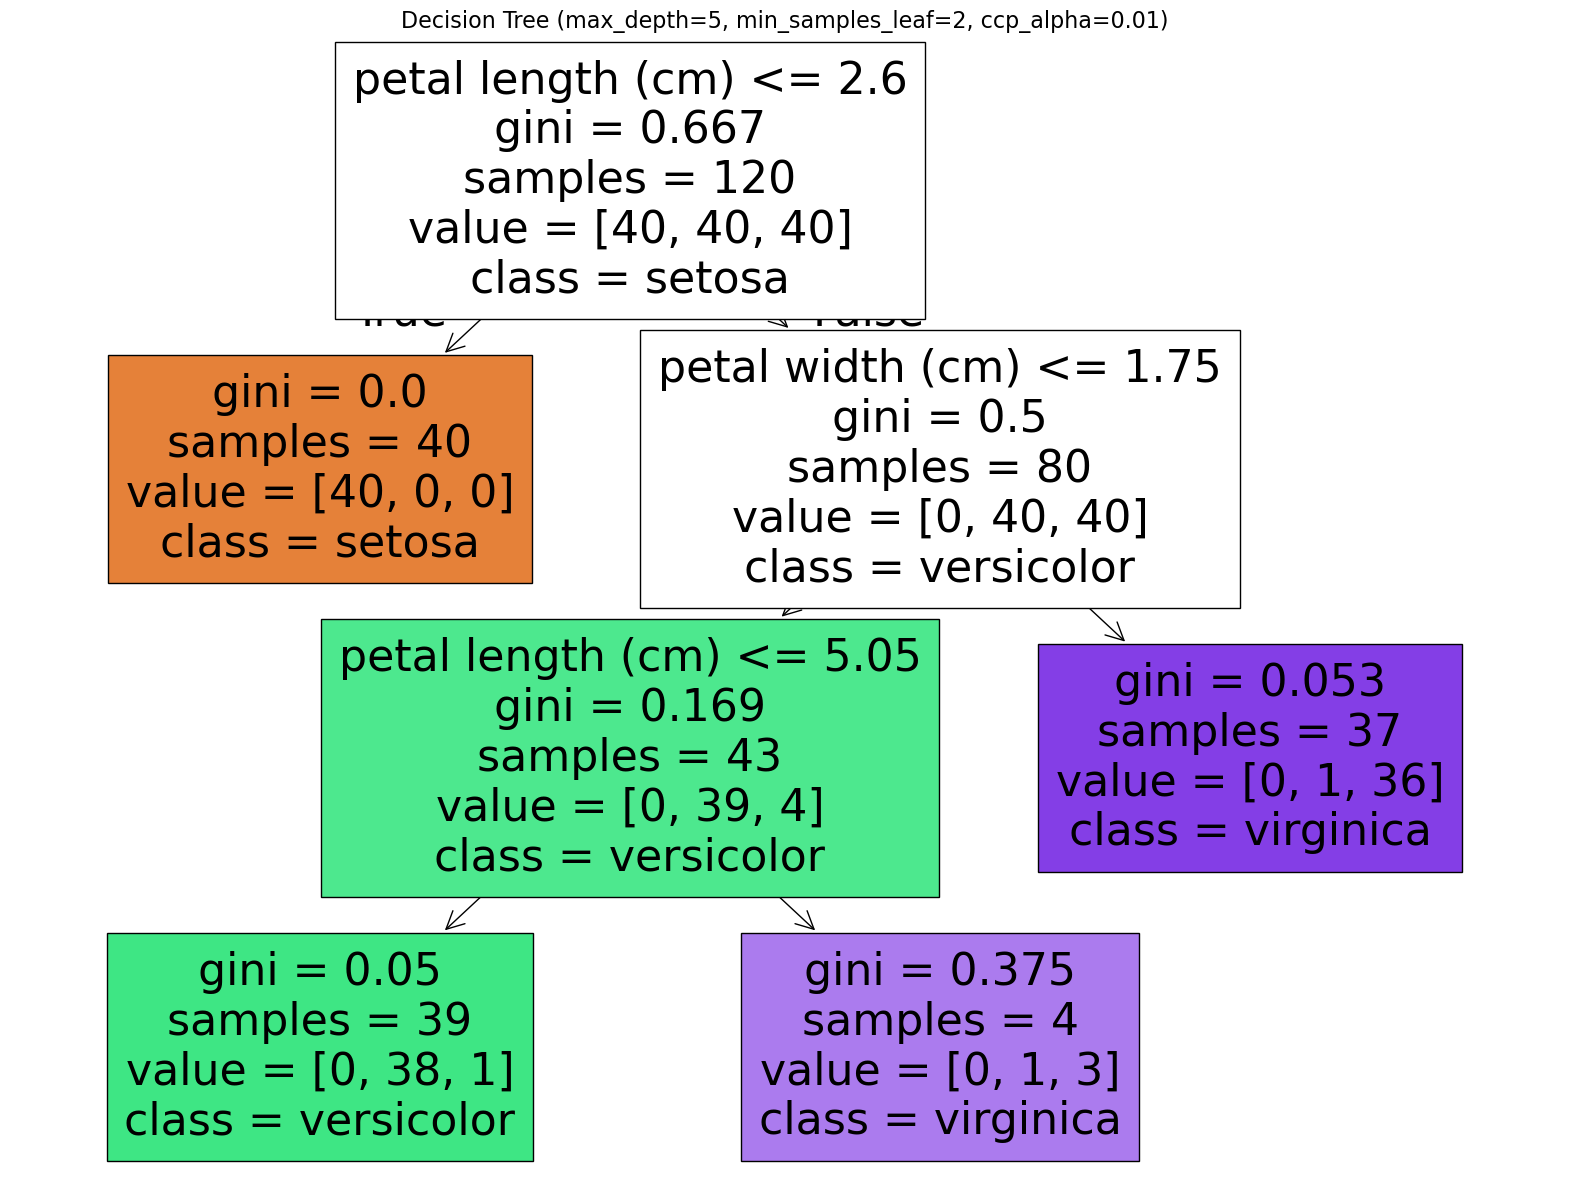

In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.01) &
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.max_depth")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.max_depth", y="metrics.f1-score", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Max Depth (ccp_alpha=0.01, min_leaf=2, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_iris(2, 2, 0.01, "gini")
utils.visualize_iris(5, 2, 0.01, "gini")

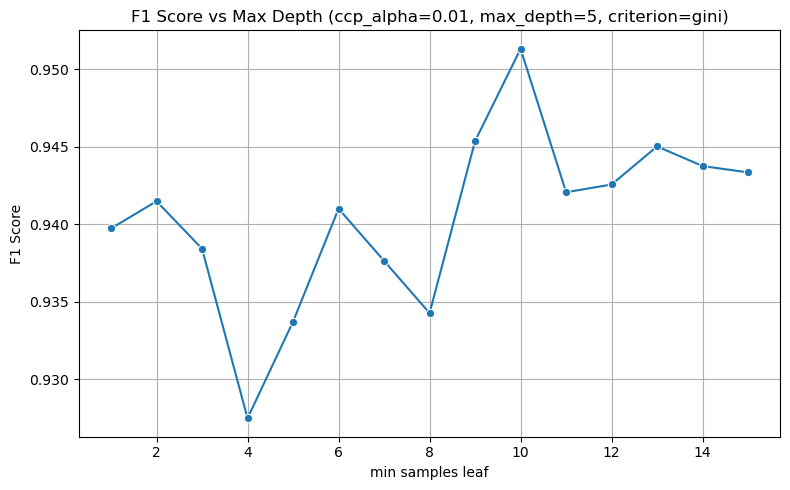

------------------------------
Overall Results
------------------------------
Accuracy: 0.9667
Macro Precision: 0.9697
Macro Recall: 0.9667
Macro F1 Score: 0.9666


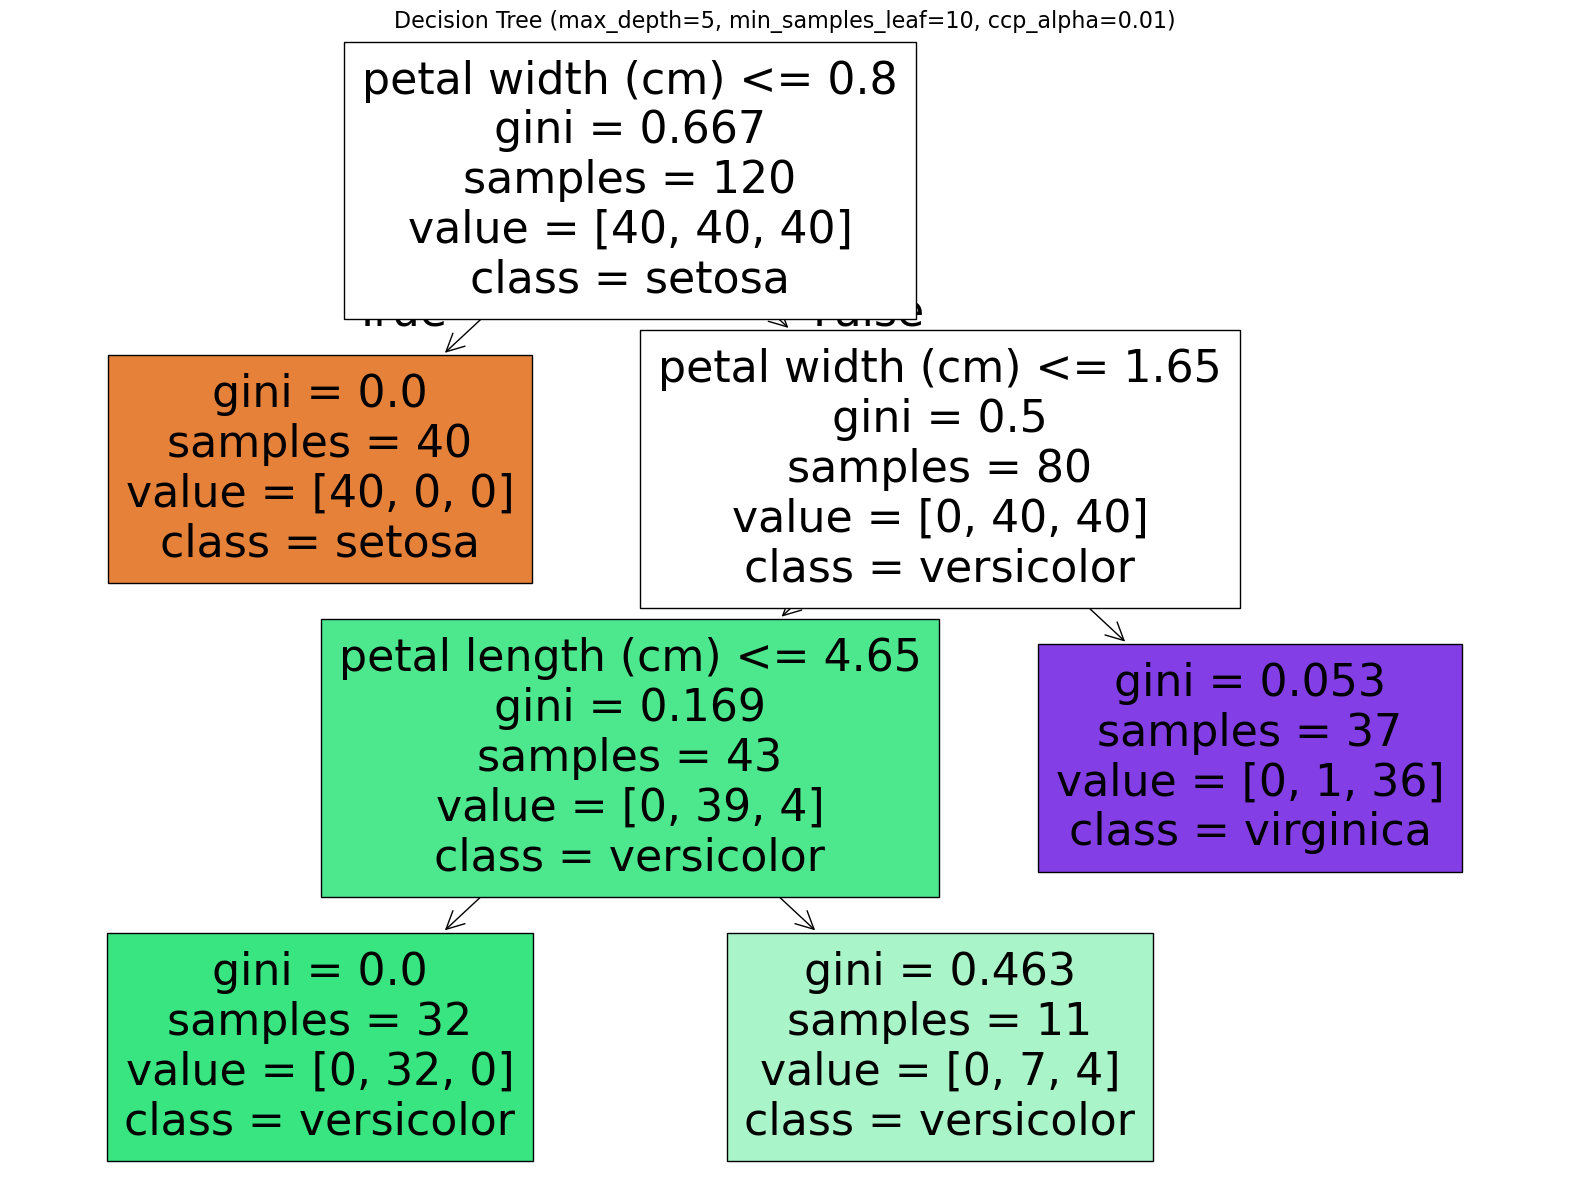

------------------------------
Overall Results
------------------------------
Accuracy: 0.9667
Macro Precision: 0.9697
Macro Recall: 0.9667
Macro F1 Score: 0.9666


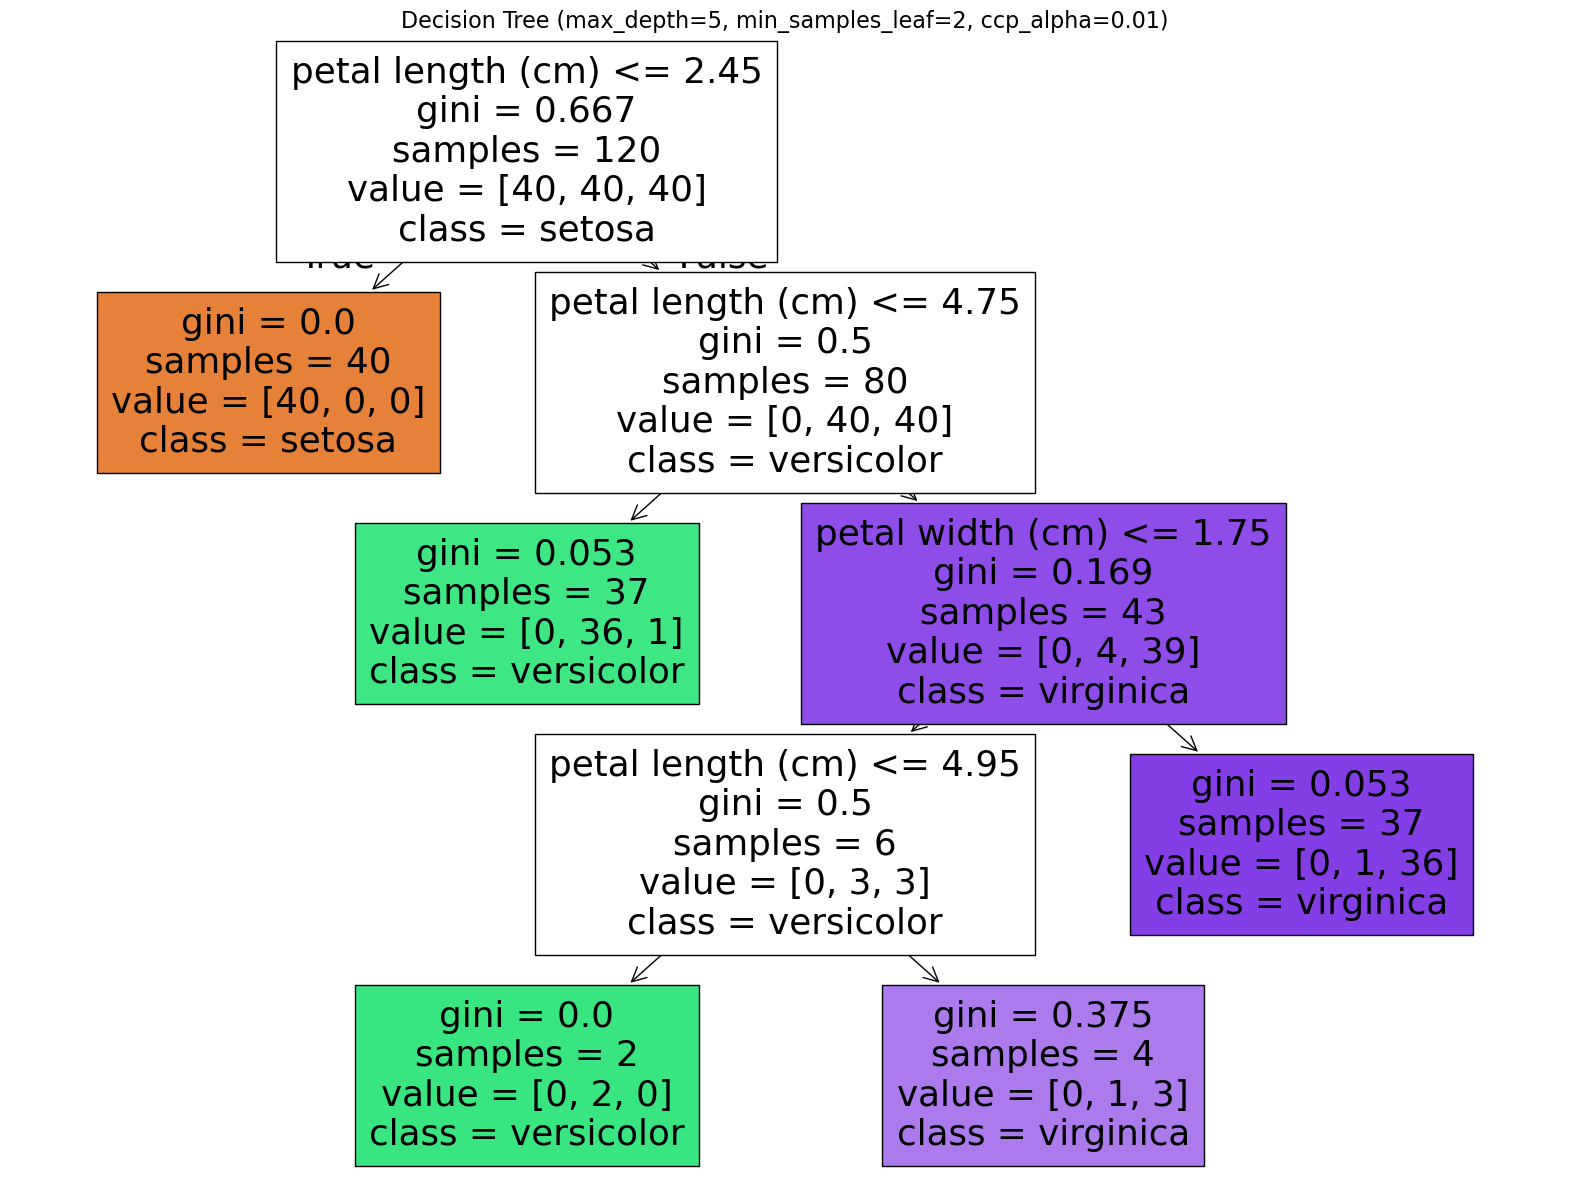

In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.01) &
    (runs["params.max_depth"] == 5) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.min_samples_leaf")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.min_samples_leaf", y="metrics.f1-score", marker="o")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Max Depth (ccp_alpha=0.01, max_depth=5, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_iris(5, 10, 0.01, "gini")
utils.visualize_iris(5, 2, 0.01, "gini")

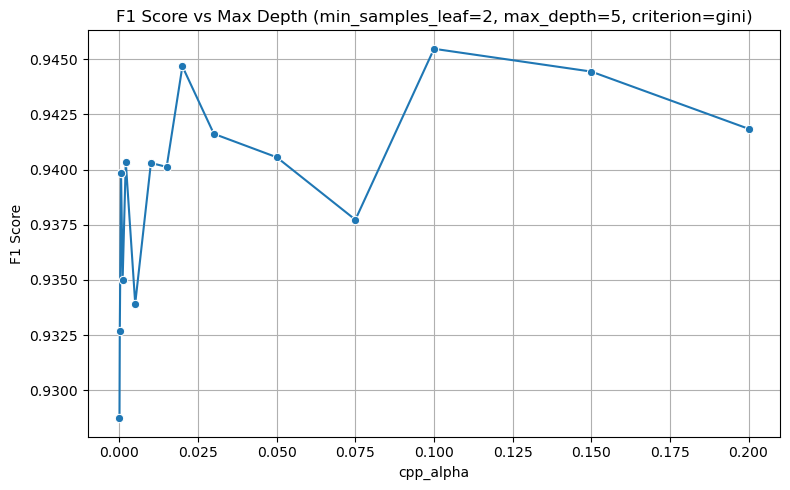

------------------------------
Overall Results
------------------------------
Accuracy: 0.9333
Macro Precision: 0.9444
Macro Recall: 0.9333
Macro F1 Score: 0.9327


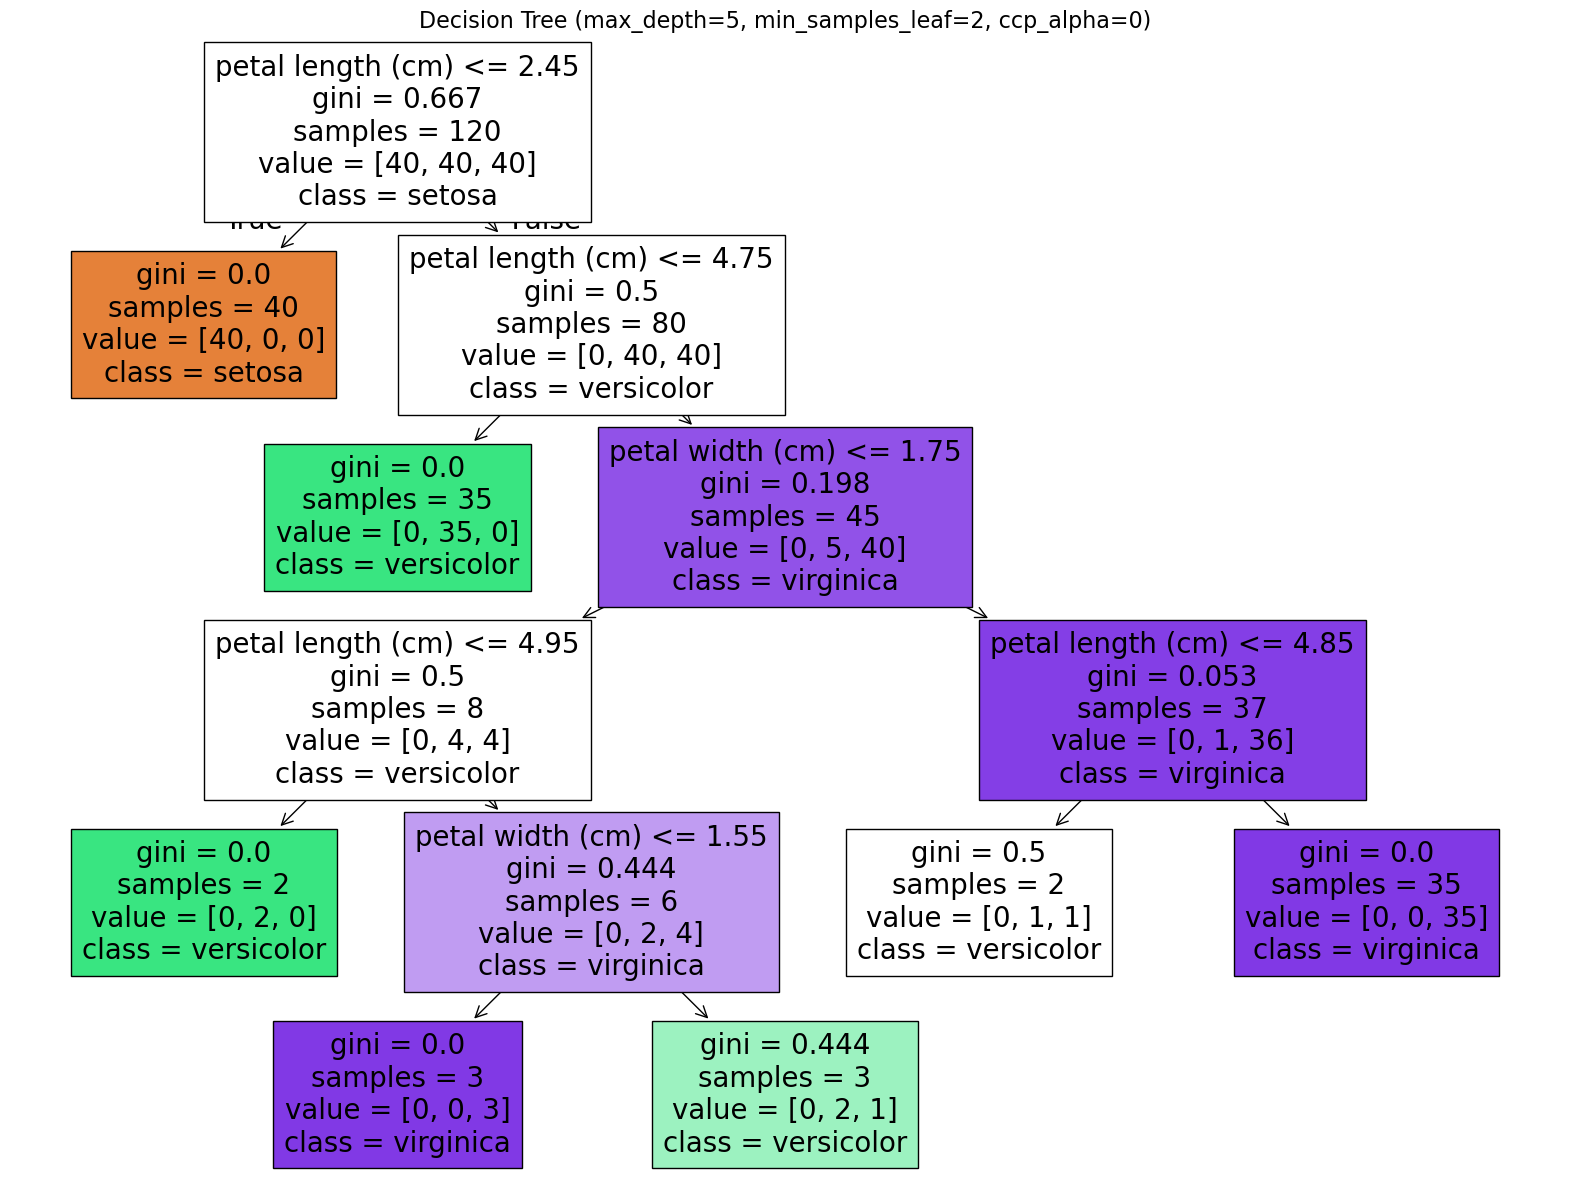

------------------------------
Overall Results
------------------------------
Accuracy: 0.9667
Macro Precision: 0.9697
Macro Recall: 0.9667
Macro F1 Score: 0.9666


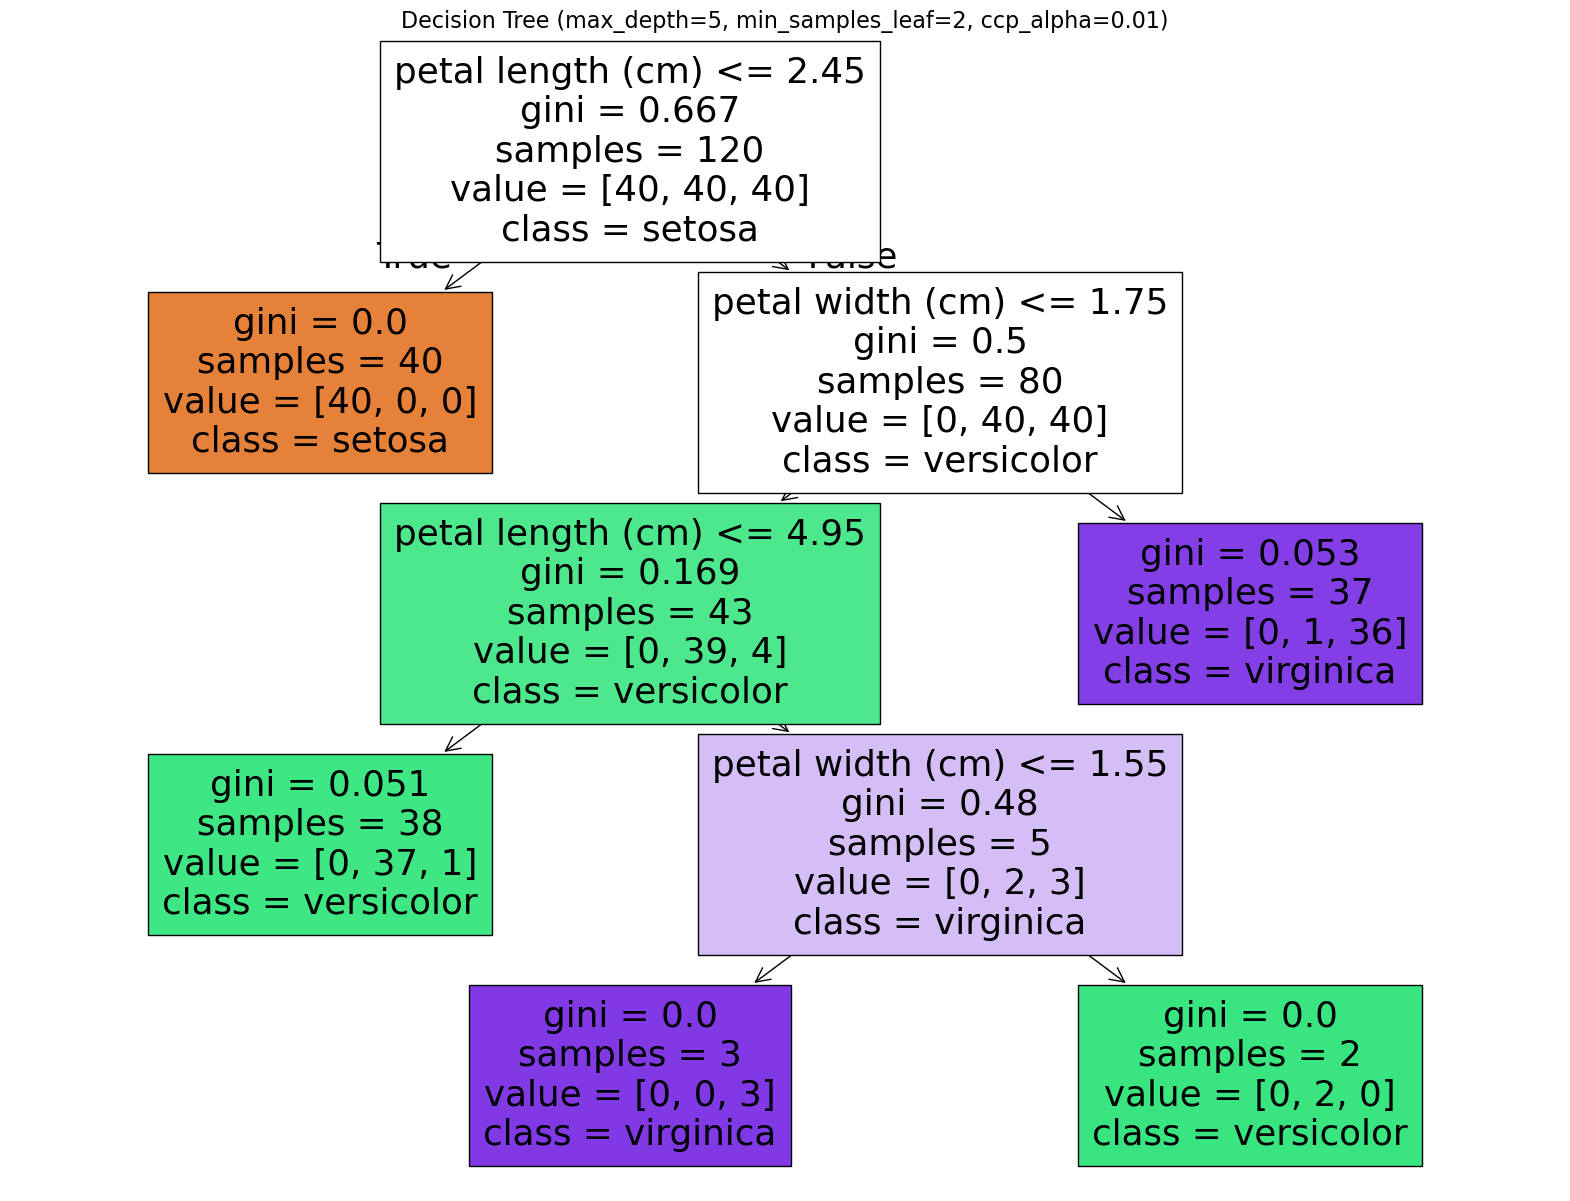

In [ ]:
filtered_runs = runs[
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.max_depth"] == 5) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.cpp_alpha")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.cpp_alpha", y="metrics.f1-score", marker="o")
plt.xlabel("cpp_alpha")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Max Depth (min_samples_leaf=2, max_depth=5, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_iris(5, 2, 0, "gini")
utils.visualize_iris(5, 2, 0.01, "gini")

------------------------------
Overall Results
------------------------------
Accuracy: 0.3333
Macro Precision: 0.1111
Macro Recall: 0.3333
Macro F1 Score: 0.1667


/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

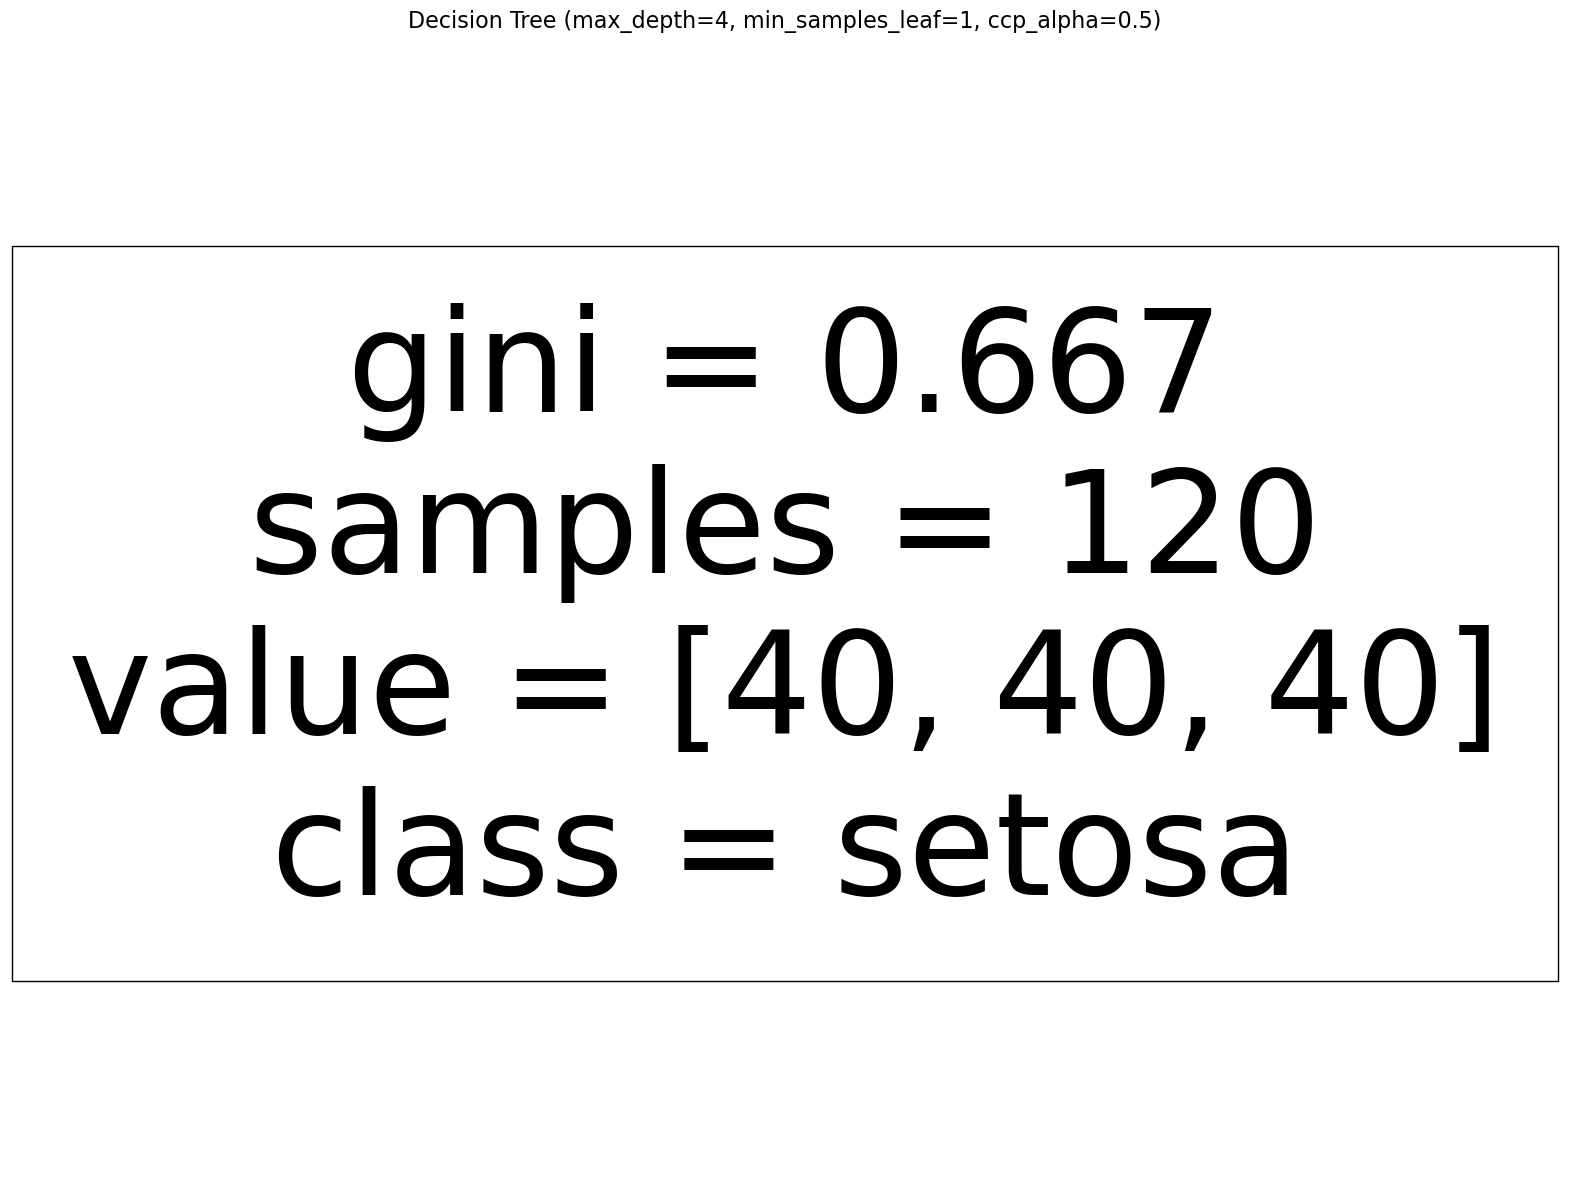

------------------------------
Overall Results
------------------------------
Accuracy: 0.9333
Macro Precision: 0.9333
Macro Recall: 0.9333
Macro F1 Score: 0.9333


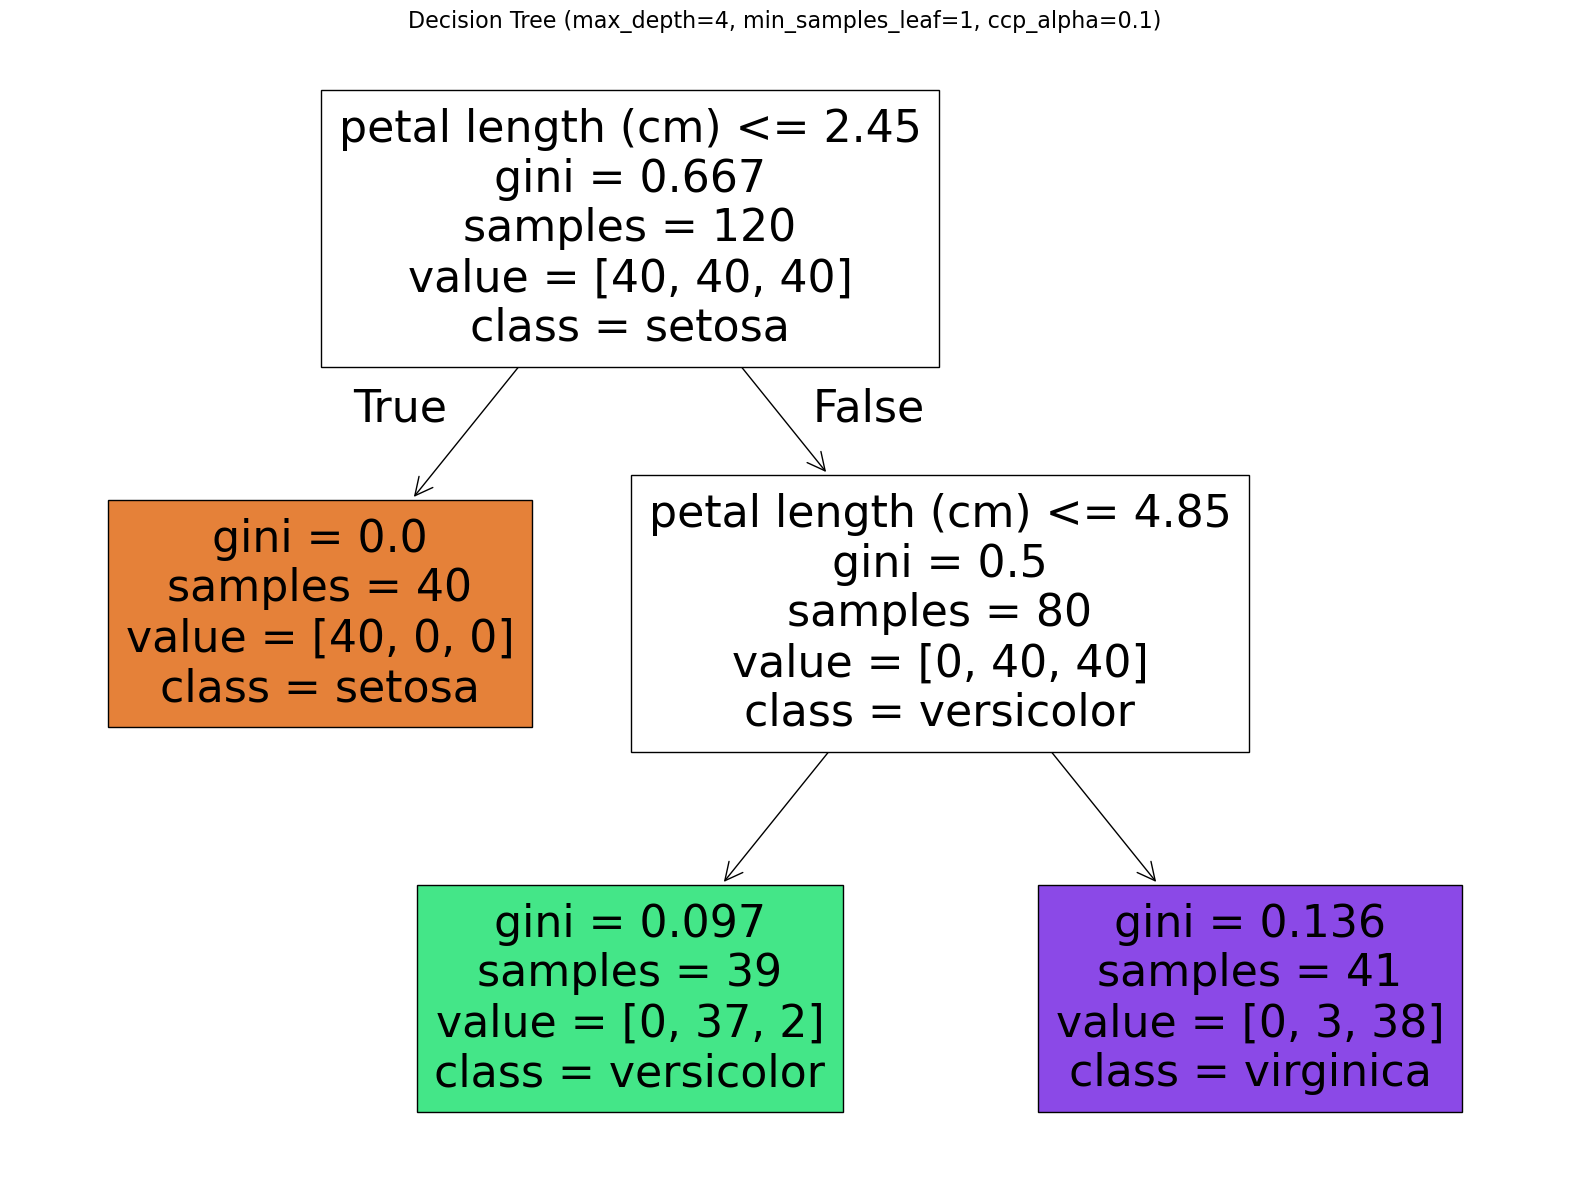

In [ ]:
utils.visualize_iris(4, 1, 0.5, "gini")
utils.visualize_iris(4, 1, 0.1, "gini")

### Wnioski 
 - Dla max_depth równego 5 i tak wystąpiło już zakończenie dla wartości depth=3
 - Wykres jest bardzo zbliżony dla wszystkich wartości max_depth
 - Dla min_samples_leaf też jest dosyć podobny i nie widać żadnego szoku
 - Dla ccp_aplha też nie ma szału, ale wartość około 0.01 radzi sobie dosyć dobrze
 - pruning dla zbyt dużych wartości np 0.5, 0.25, 0.1 ucina zbyt wiele informacji

### Wątpliwości
 - Wyniki z cross validation są nieadekwatne do wyników na zbiorze testowym...
 - Zasadniczo wszystko jest dosyć blisko siebie i ciężko powiedzieć, że któremuś drzewu idzie źle

Best parameters:

### Wine

In [ ]:
runs = utils.load_experiment_data("Test_wine")

Loaded 240 runs from experiment 'Test_wine'


In [ ]:
top_5_recall = runs.sort_values(by="metrics.recall", ascending=False).head(5)
print(top_5_recall[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_precision = runs.sort_values(by="metrics.precision", ascending=False).head(5)
print(top_5_precision[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_f1 = runs.sort_values(by="metrics.f1-score", ascending=False).head(5)
print(top_5_f1[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])
# "metrics.recall", "metrics.precision", "metrics.f1-score"

    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
143                0             gini                4                       1
47                 0             gini                8                       1
189             0.01             gini                3                       1
95                 0             gini                6                       1
191                0             gini                3                       1
    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
191                0             gini                3                       1
143                0             gini                4                       1
47                 0             gini                8                       1
189             0.01             gini                3                       1
27             0.025             gini                8                       2
    params.cpp_alpha params.criterion params.max_dep

In [ ]:
runs = utils.load_experiment_data("Test_wine_specific")
runs["params.cpp_alpha"] = pd.to_numeric(runs["params.cpp_alpha"])
runs["params.min_samples_leaf"] = pd.to_numeric(runs["params.min_samples_leaf"])
runs["params.max_depth"] = pd.to_numeric(runs["params.max_depth"])

Loaded 46 runs from experiment 'Test_wine_specific'


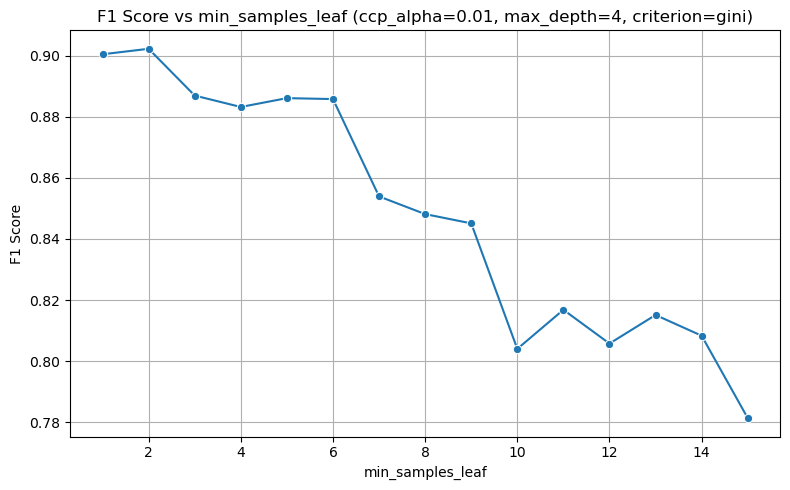

------------------------------
Overall Results
------------------------------
Accuracy: 0.9444
Macro Precision: 0.9583
Macro Recall: 0.9389
Macro F1 Score: 0.9457


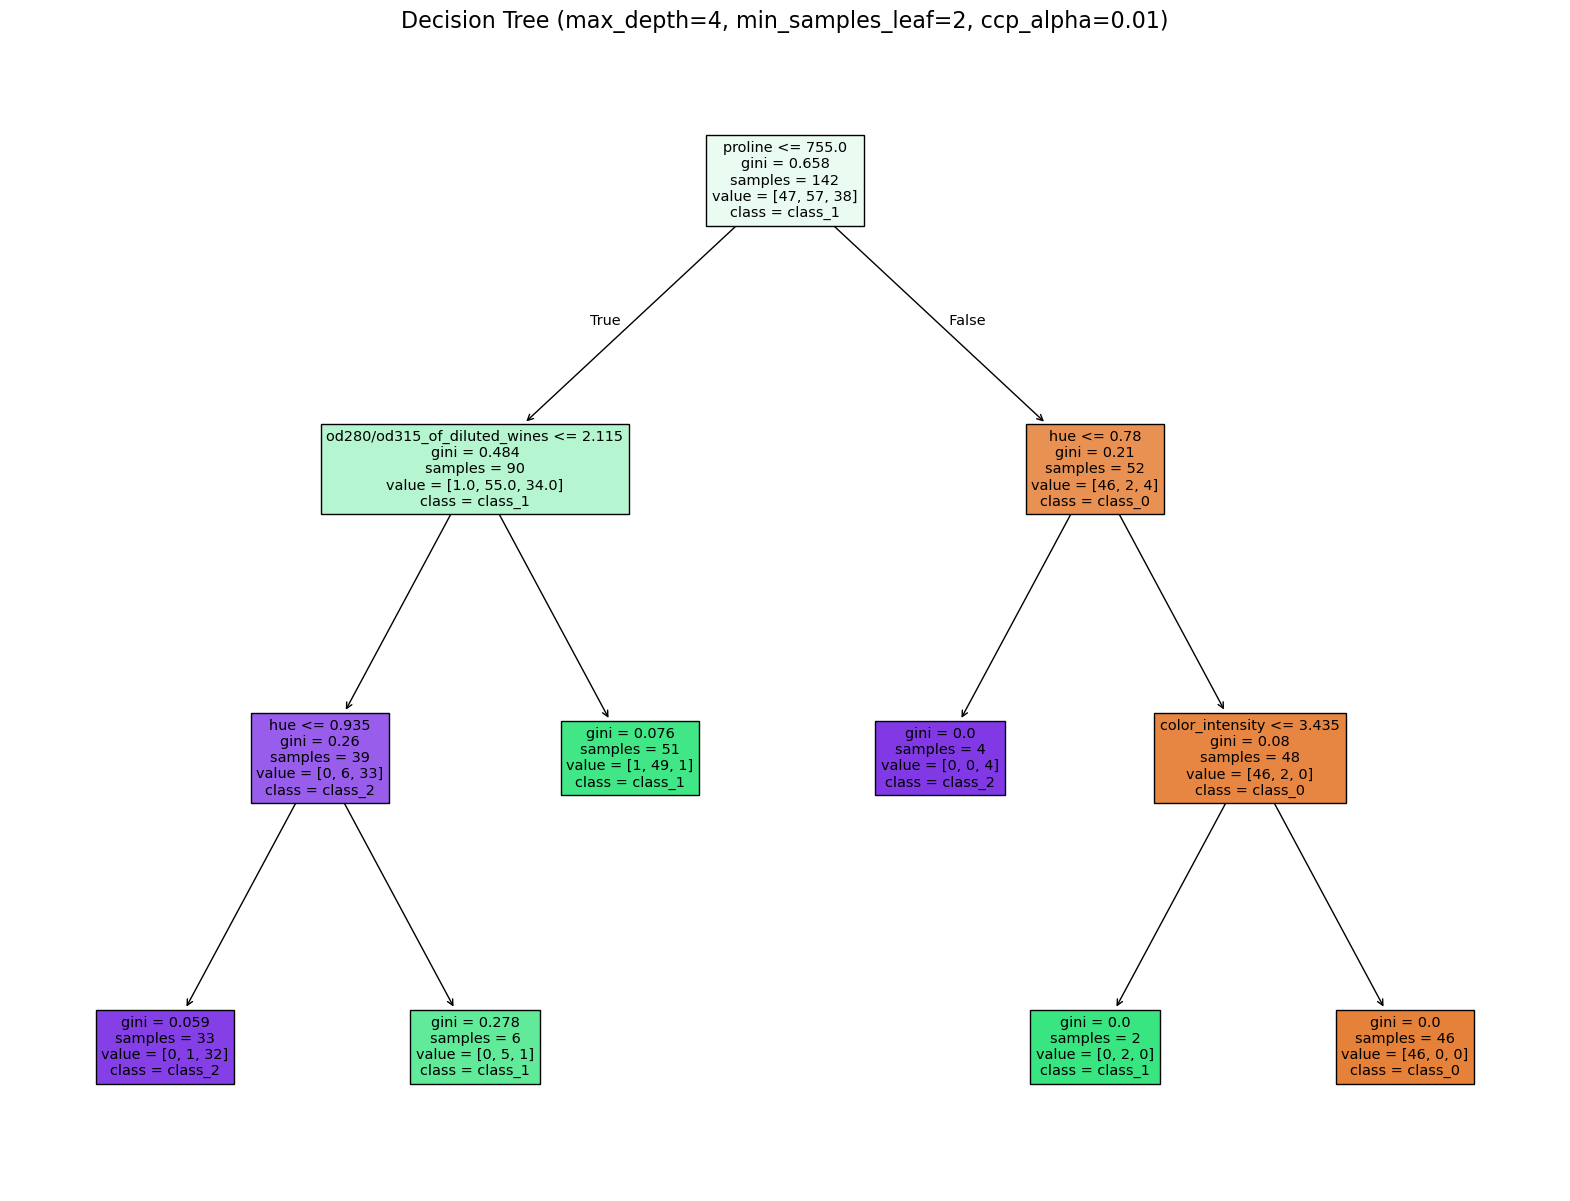

------------------------------
Overall Results
------------------------------
Accuracy: 0.8333
Macro Precision: 0.8386
Macro Recall: 0.8151
Macro F1 Score: 0.8175


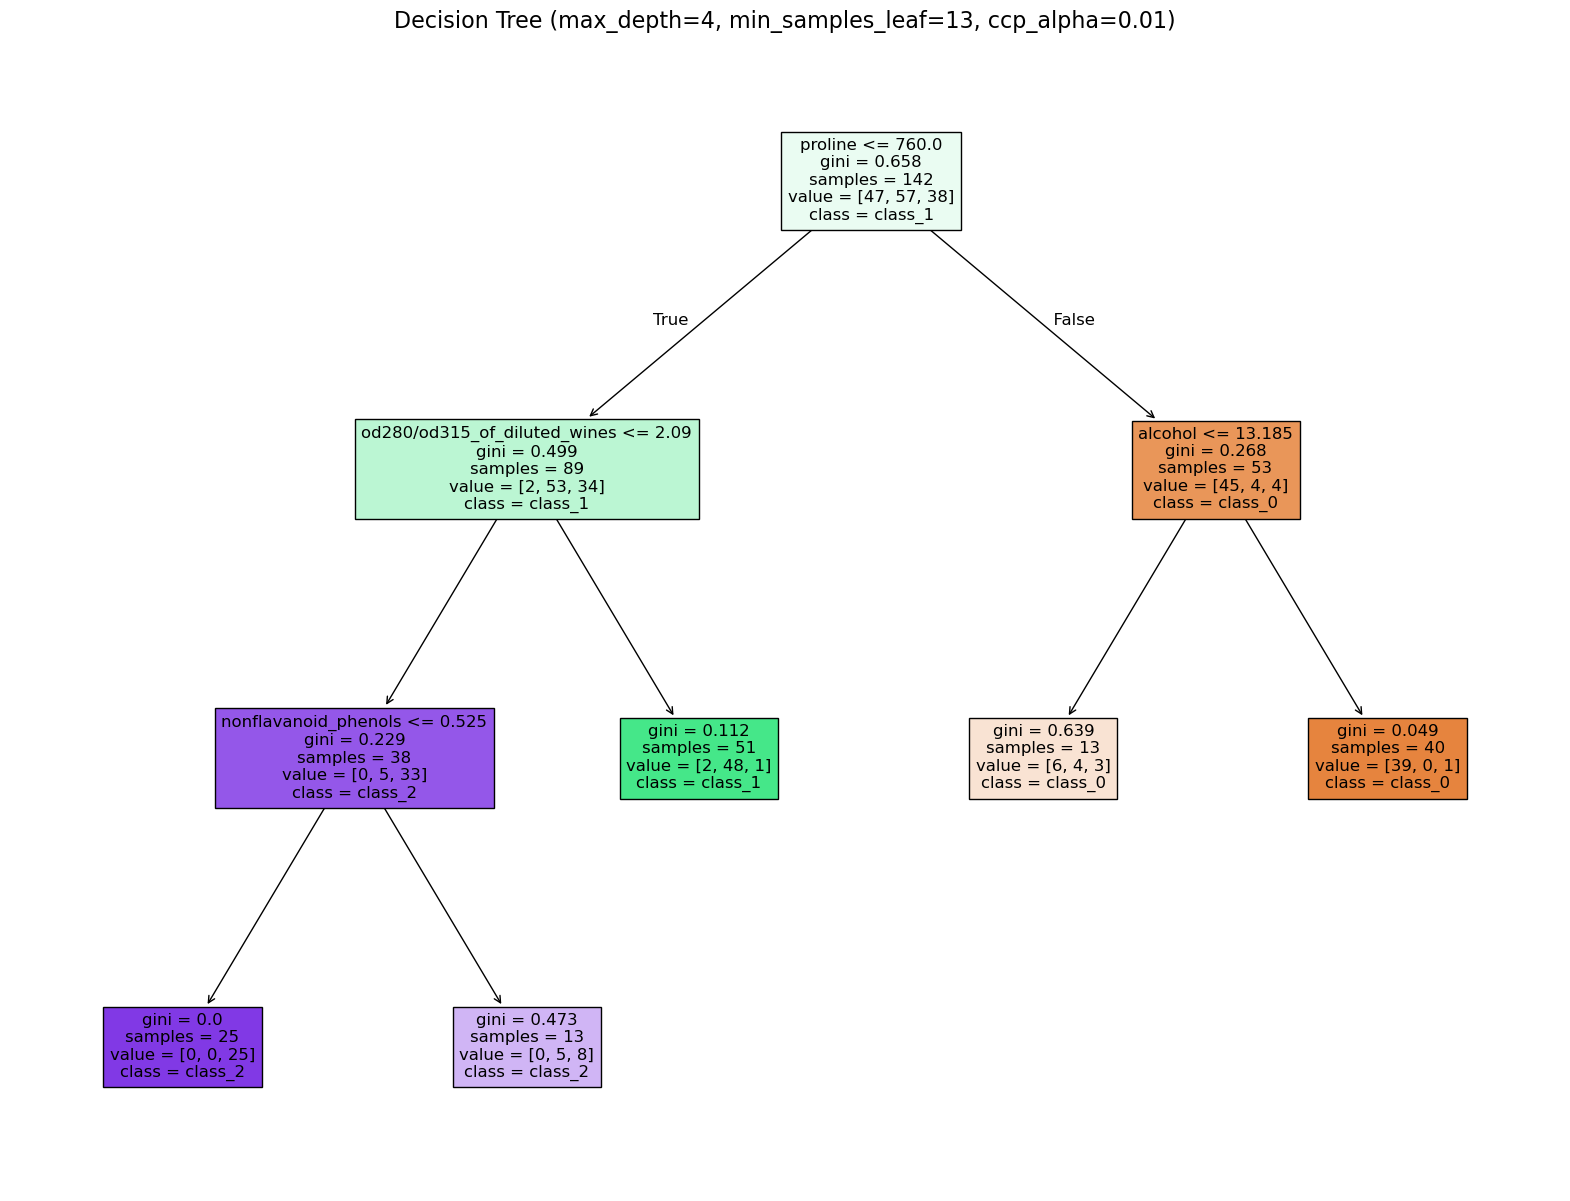

In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.01) &
    (runs["params.max_depth"] == 4) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.min_samples_leaf")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.min_samples_leaf", y="metrics.f1-score", marker="o")
plt.xlabel("min_samples_leaf")
plt.ylabel("F1 Score")
plt.title("F1 Score vs min_samples_leaf (ccp_alpha=0.01, max_depth=4, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_wine(4, 2, 0.01, "gini")
utils.visualize_wine(4, 13, 0.01, "gini")

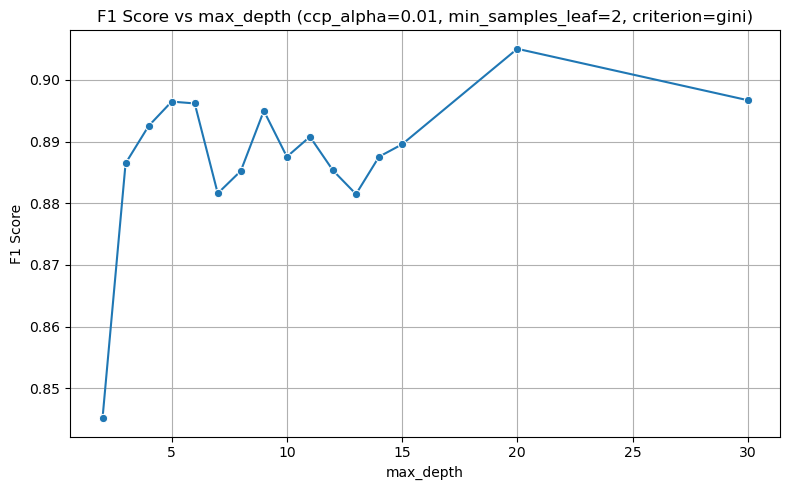

------------------------------
Overall Results
------------------------------
Accuracy: 0.8333
Macro Precision: 0.8500
Macro Recall: 0.8357
Macro F1 Score: 0.8394


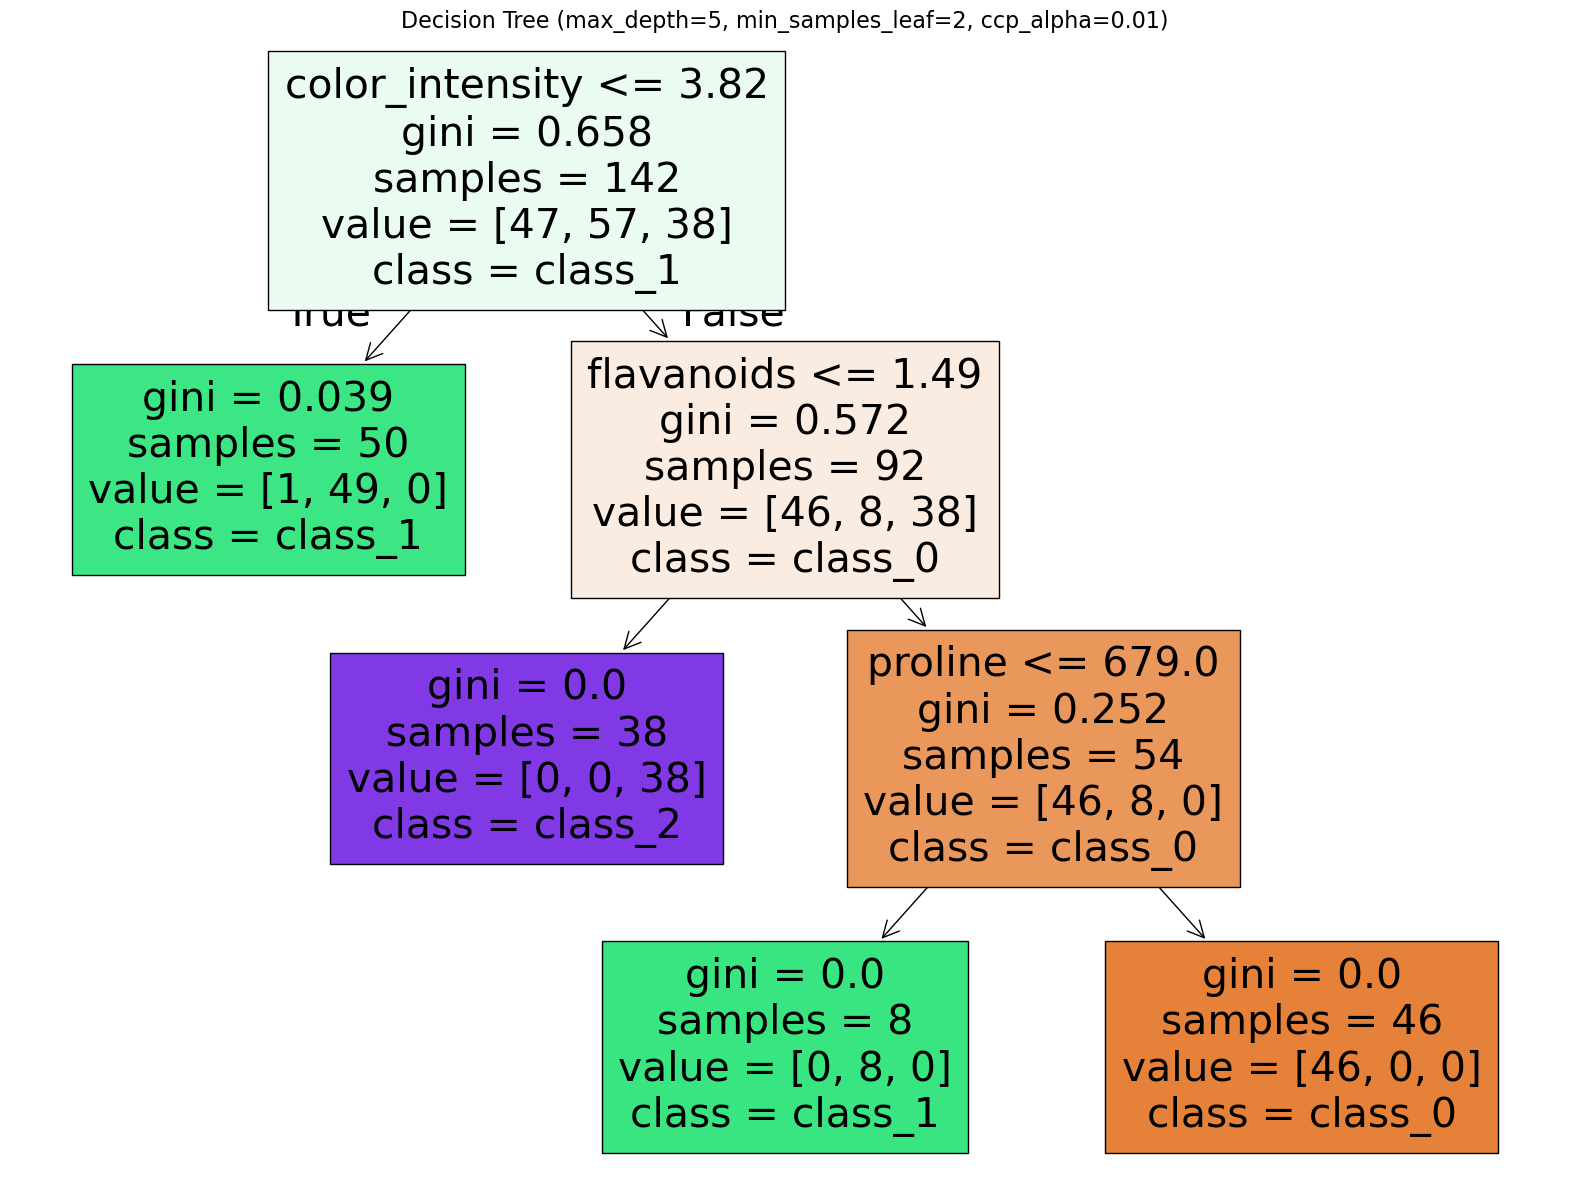

------------------------------
Overall Results
------------------------------
Accuracy: 0.9167
Macro Precision: 0.9222
Macro Recall: 0.9151
Macro F1 Score: 0.9177


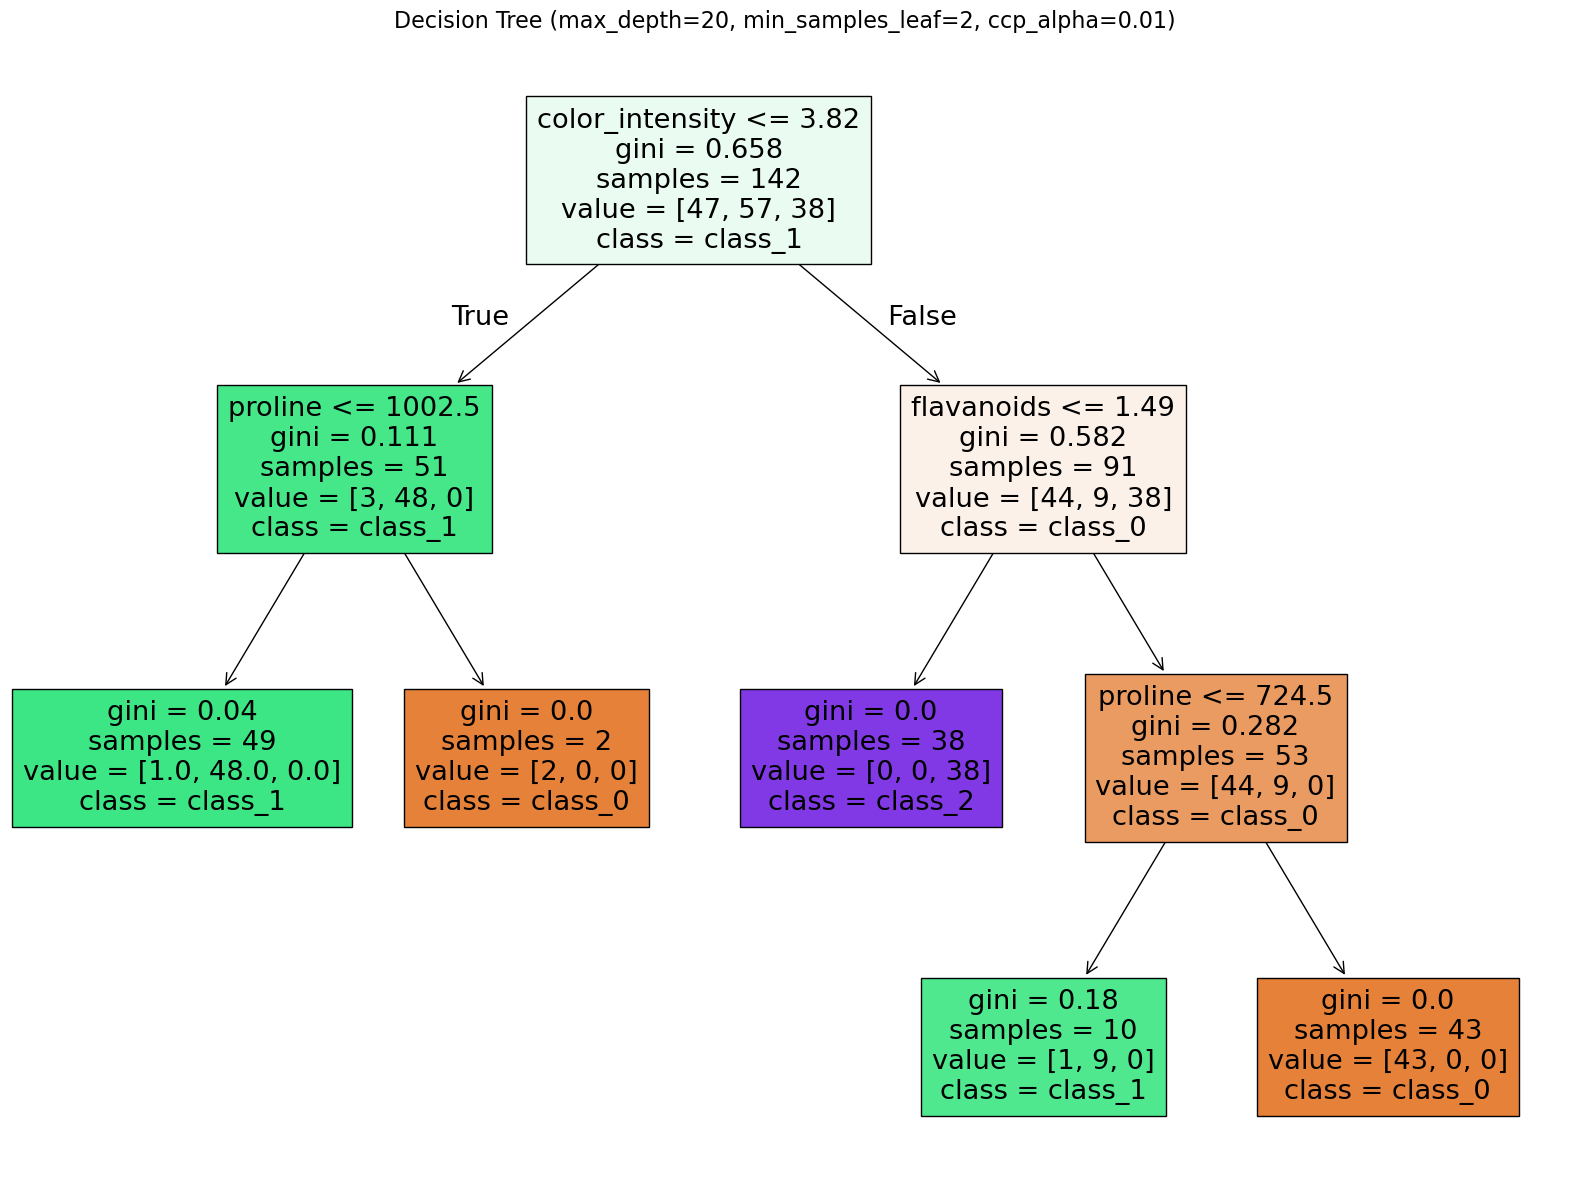

In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.01) &
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.max_depth")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.max_depth", y="metrics.f1-score", marker="o")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.title("F1 Score vs max_depth (ccp_alpha=0.01, min_samples_leaf=2, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_wine(5, 2, 0.01, "gini")
utils.visualize_wine(20, 2, 0.01, "gini")

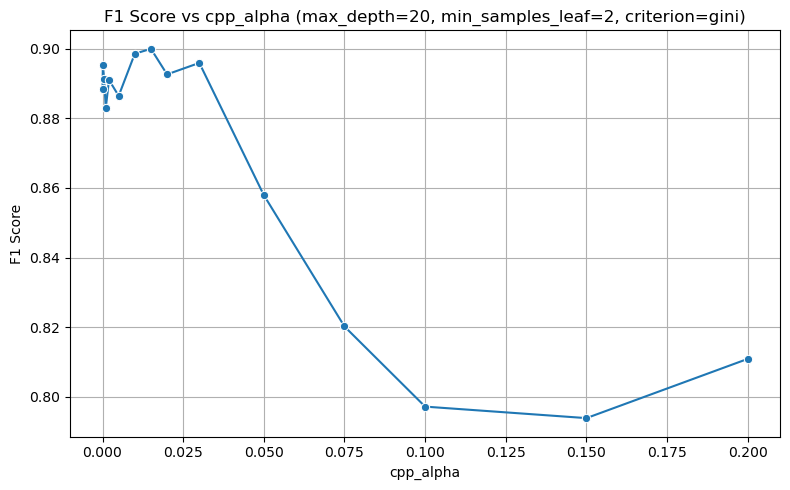

------------------------------
Overall Results
------------------------------
Accuracy: 0.8333
Macro Precision: 0.8462
Macro Recall: 0.8151
Macro F1 Score: 0.8204


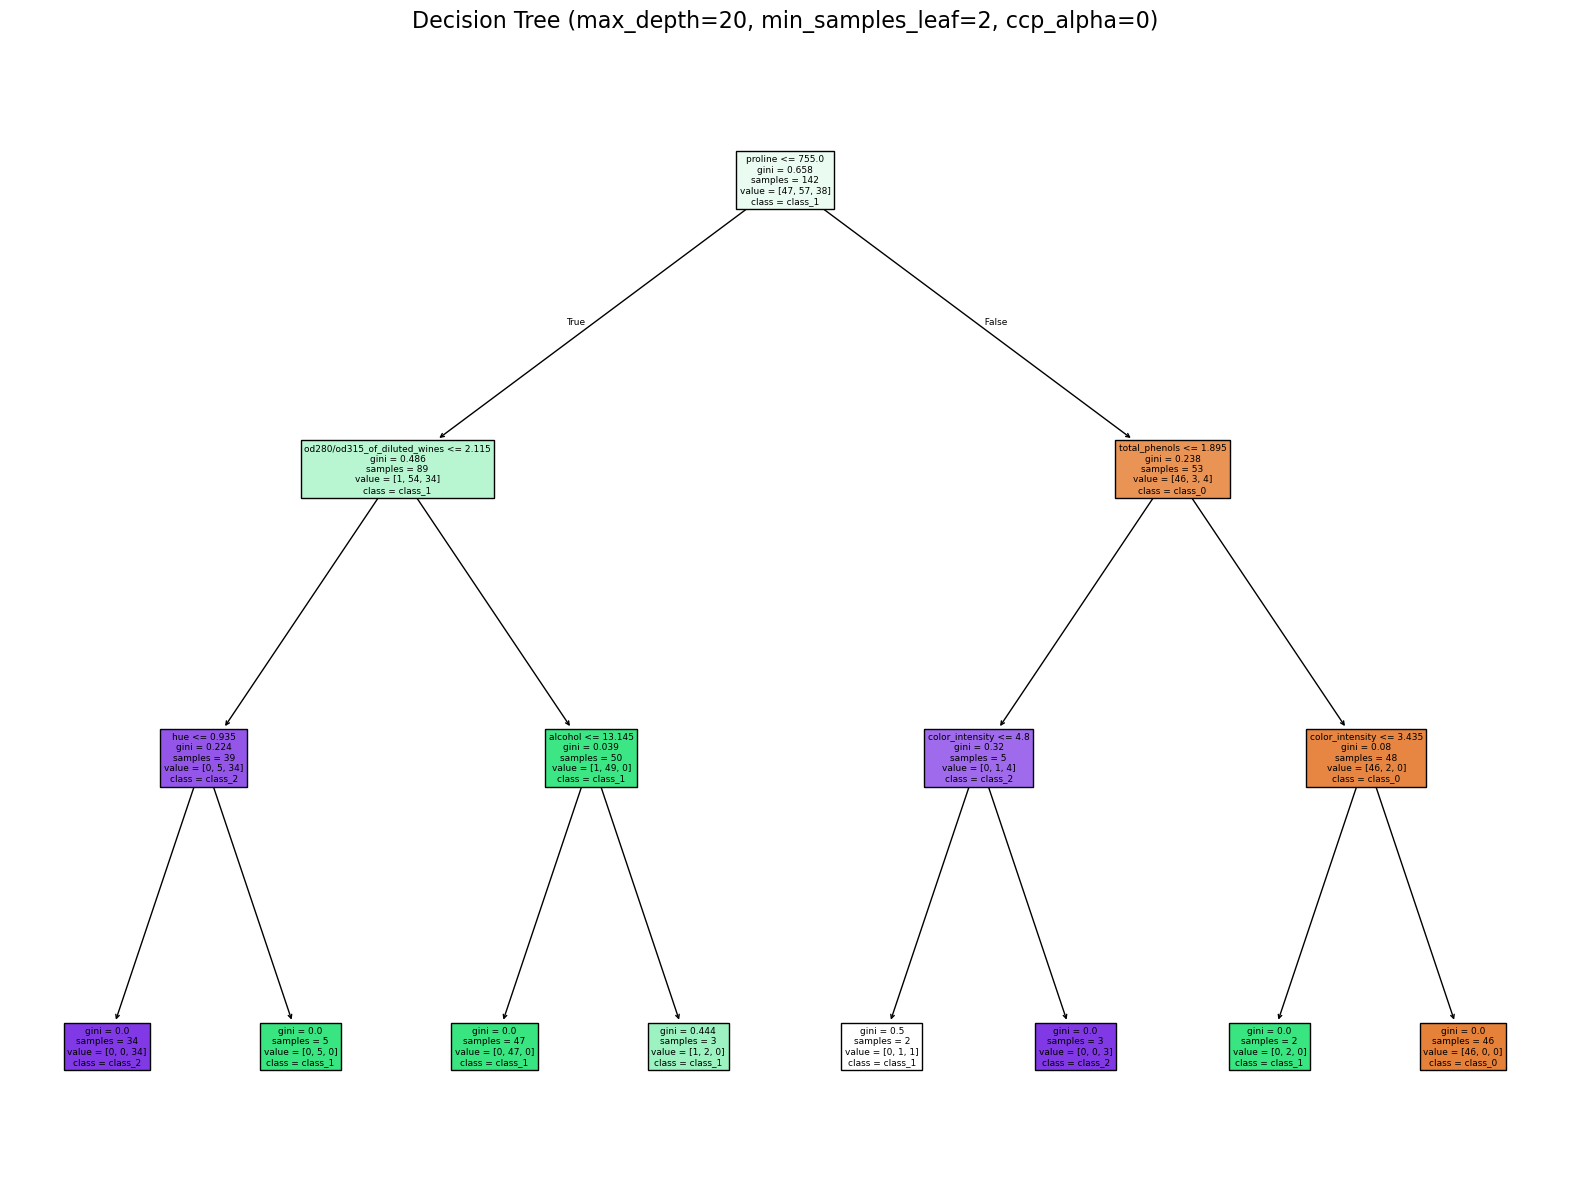

------------------------------
Overall Results
------------------------------
Accuracy: 0.8889
Macro Precision: 0.8906
Macro Recall: 0.9008
Macro F1 Score: 0.8928


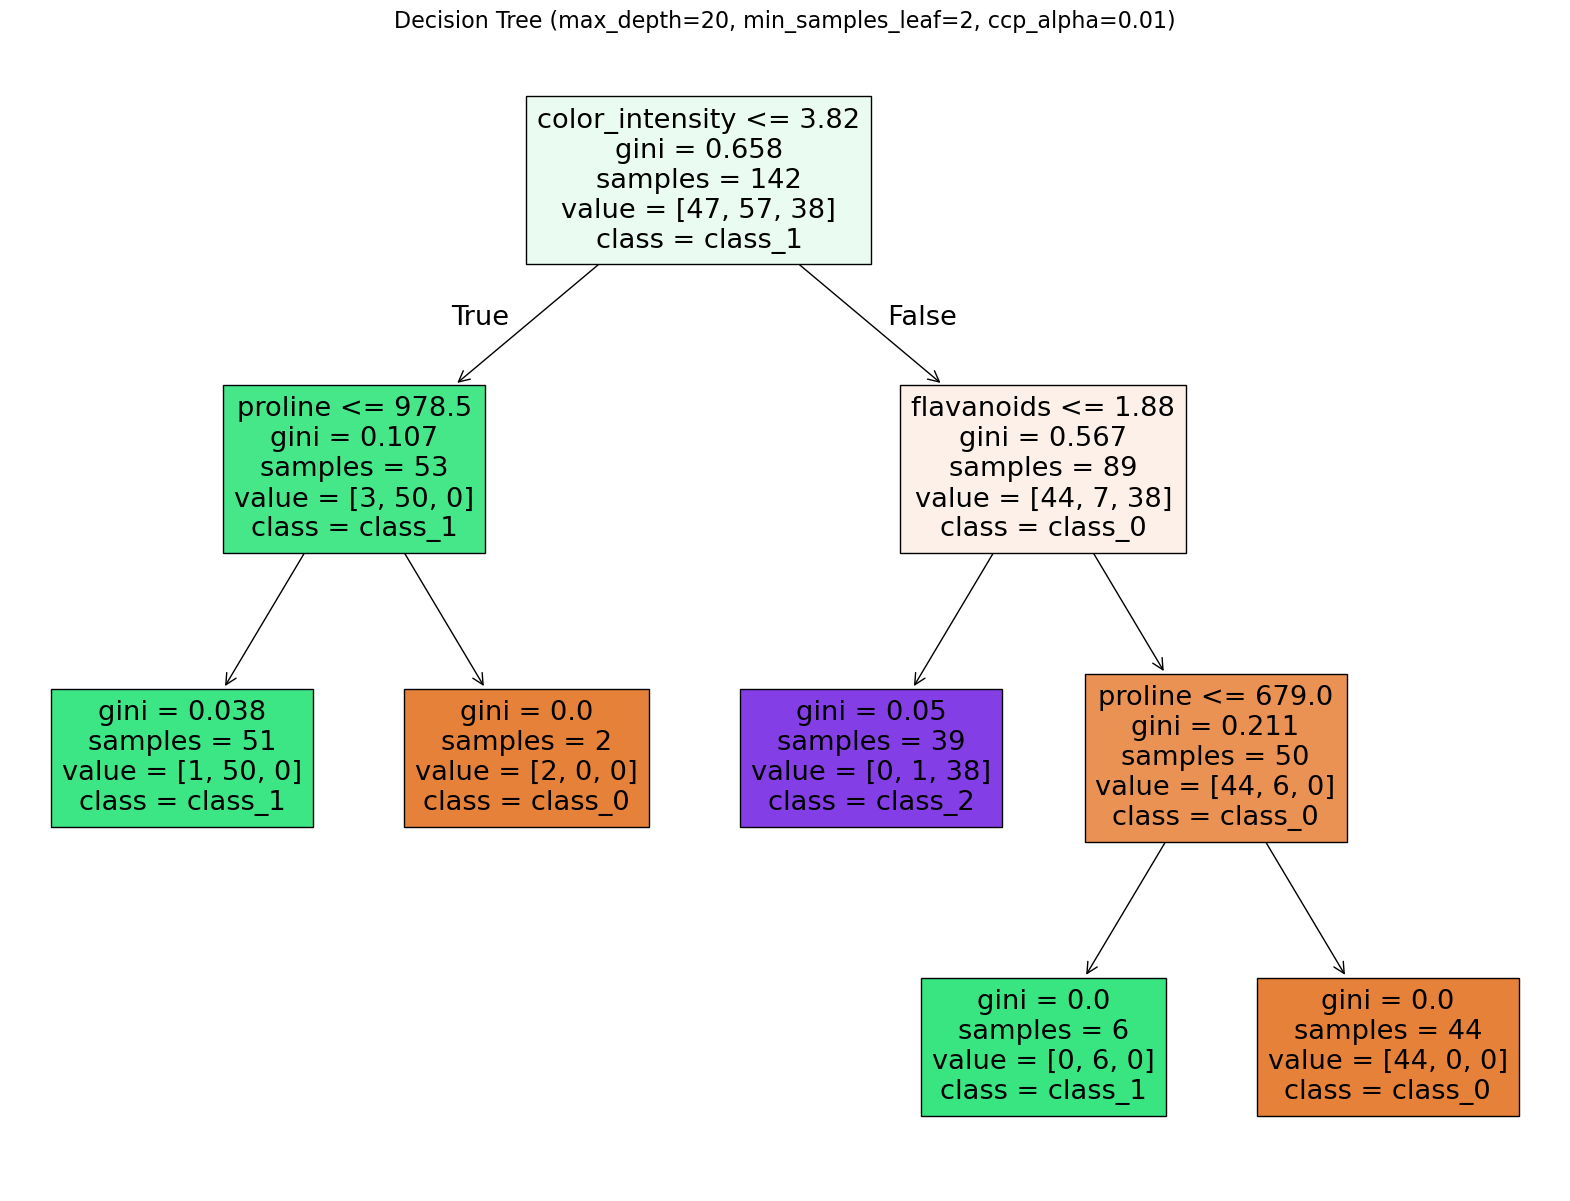

------------------------------
Overall Results
------------------------------
Accuracy: 0.8889
Macro Precision: 0.8906
Macro Recall: 0.9008
Macro F1 Score: 0.8928


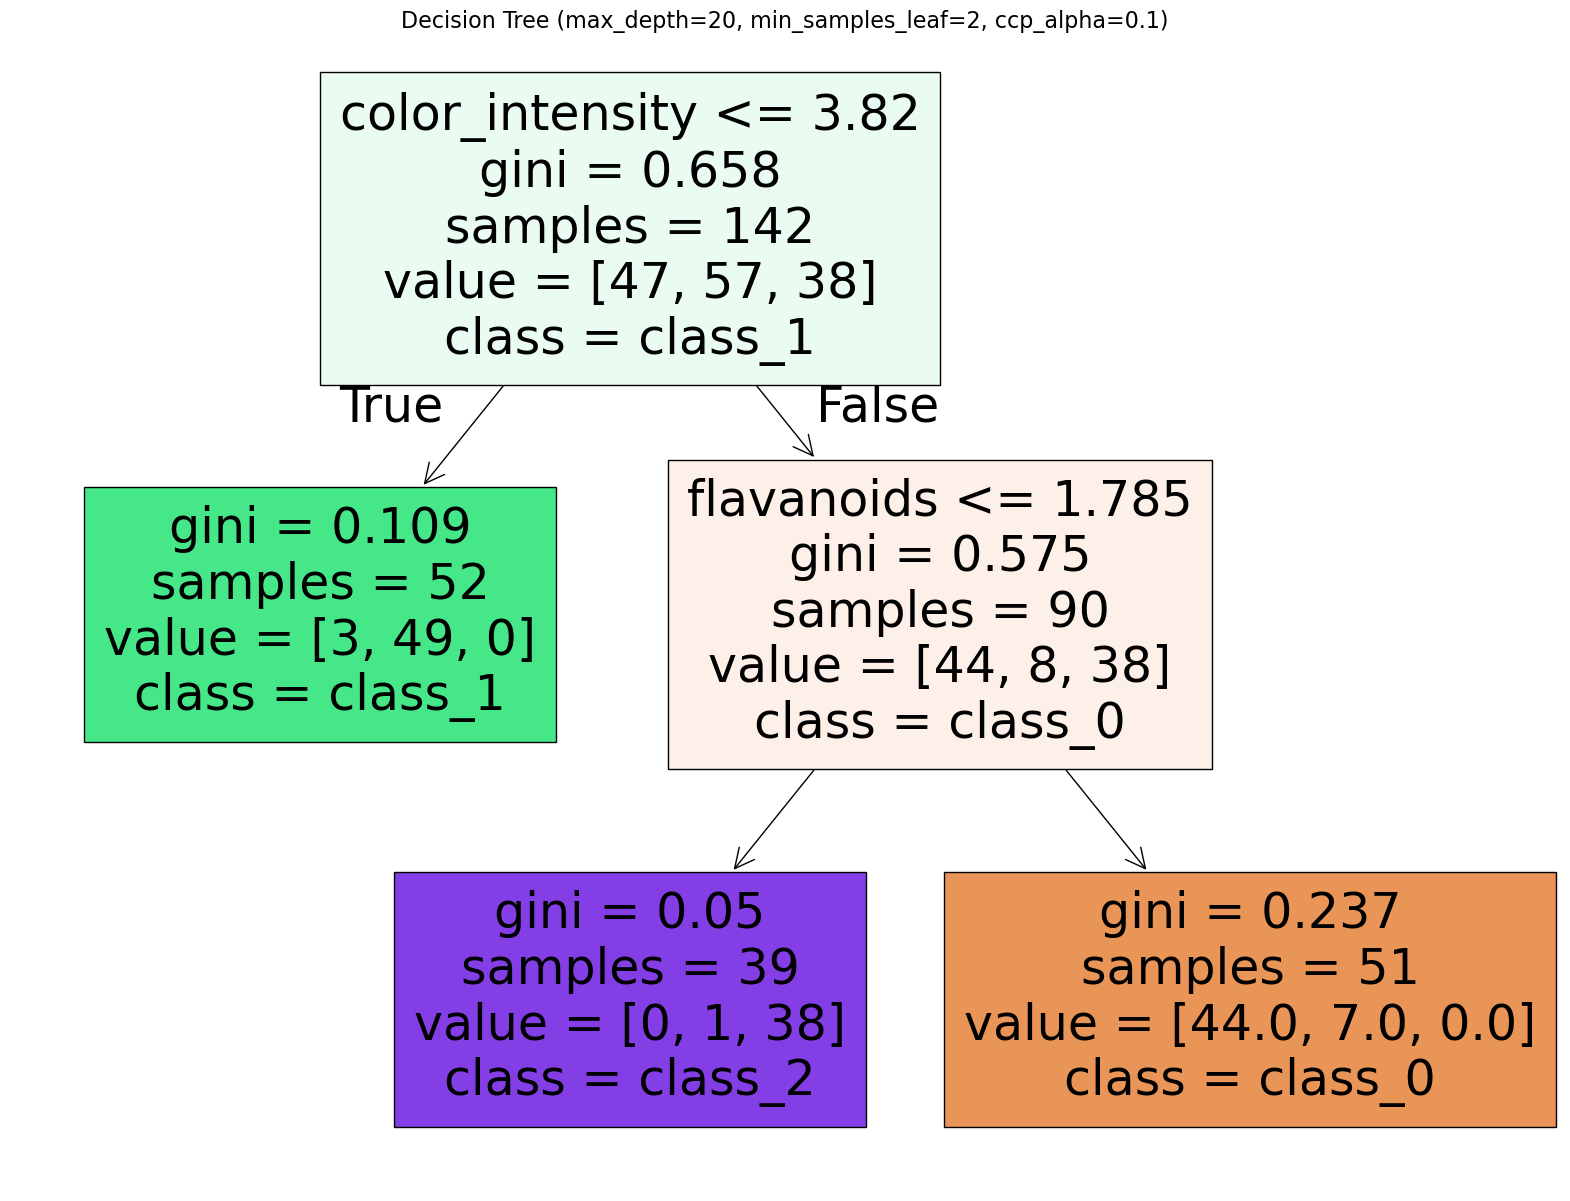

In [ ]:
filtered_runs = runs[
    (runs["params.max_depth"] == 20) &
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.cpp_alpha")["metrics.f1-score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.cpp_alpha", y="metrics.f1-score", marker="o")
plt.xlabel("cpp_alpha")
plt.ylabel("F1 Score")
plt.title("F1 Score vs cpp_alpha (max_depth=20, min_samples_leaf=2, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_wine(20, 2, 0, "gini")
utils.visualize_wine(20, 2, 0.01, "gini")
utils.visualize_wine(20, 2, 0.1, "gini")

- min_samples_leaf sprawdza się lepiej w niskich wartościach dla zbioru wine - możliwe, że dlatego, że klasy są ciężko separowalne, a każdej klasy jest dosyć mało przykładów w zbiorze. Jednak dla wartości 1-6 te różnice nie są takie duże.
- Dla dużych wartości max_depth i tak uzyskujemy podobne wyniki, a wytworzone drzewa i tak mają realnie małą głębokość. Wpływ może mieć parametr ccp_alpha który czyści drzewa już po utworzeniu.
- ccp_alpha sprawdza się dosyć słabo dla mocniejszych wartości, a dla mniejszych osiąga niezłe wyniki. Dla wartości zero za to na wykresie widzimy wysoką skuteczność, ale realnie drzewo jest overfittowane i wynik jest słaby.

### PCB

In [ ]:
runs = utils.load_experiment_data("Test_pcb")
top_5_recall = runs.sort_values(by="metrics.recall_class_1", ascending=False).head(5)
print(top_5_recall[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_precision = runs.sort_values(by="metrics.precision_class_1", ascending=False).head(5)
print(top_5_precision[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf"]])

top_5_f1 = runs.sort_values(by="metrics.f1-score_class_1", ascending=False).head(5)
print(top_5_f1[["params.cpp_alpha", "params.criterion", "params.max_depth", "params.min_samples_leaf", "metrics.recall_class_1", "metrics.precision_class_1", "metrics.f1-score_class_1"]])
# "metrics.recall", "metrics.precision", "metrics.f1-score"

Loaded 960 runs from experiment 'Test_pcb'
    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
78                 0          entropy               30                       2
62                 0          entropy               30                       4
174                0          entropy               20                       2
95                 0             gini               30                       1
46                 0          entropy               30                       7
    params.cpp_alpha params.criterion params.max_depth params.min_samples_leaf
606                0          entropy                6                      10
494                0          entropy                8                      20
654                0          entropy                6                       2
638                0          entropy                6                       4
622                0          entropy                6                       7
    param

In [ ]:
runs = utils.load_experiment_data("Test_pcb_specific")
runs["params.cpp_alpha"] = pd.to_numeric(runs["params.cpp_alpha"])
runs["params.min_samples_leaf"] = pd.to_numeric(runs["params.min_samples_leaf"])
runs["params.max_depth"] = pd.to_numeric(runs["params.max_depth"])

Loaded 54 runs from experiment 'Test_pcb_specific'


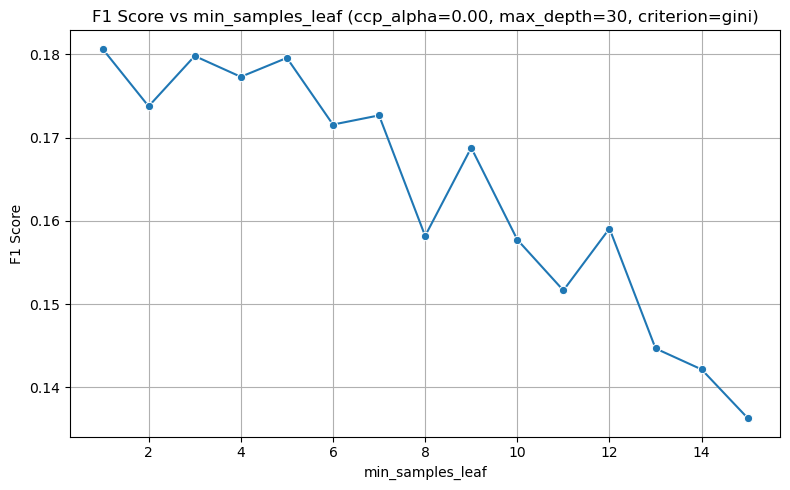

/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9279
Precision: 0.1905
Recall: 0.1633
F1 Score: 0.1758


/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9433
Precision: 0.2368
Recall: 0.0918
F1 Score: 0.1324


In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.00) &
    (runs["params.max_depth"] == 30) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.min_samples_leaf")["metrics.f1-score_class_1"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.min_samples_leaf", y="metrics.f1-score_class_1", marker="o")
plt.xlabel("min_samples_leaf")
plt.ylabel("F1 Score")
plt.title("F1 Score vs min_samples_leaf (ccp_alpha=0.00, max_depth=30, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_pcb(30, 2, 0.00, "gini", False)
utils.visualize_pcb(30, 15, 0.00, "gini", False)

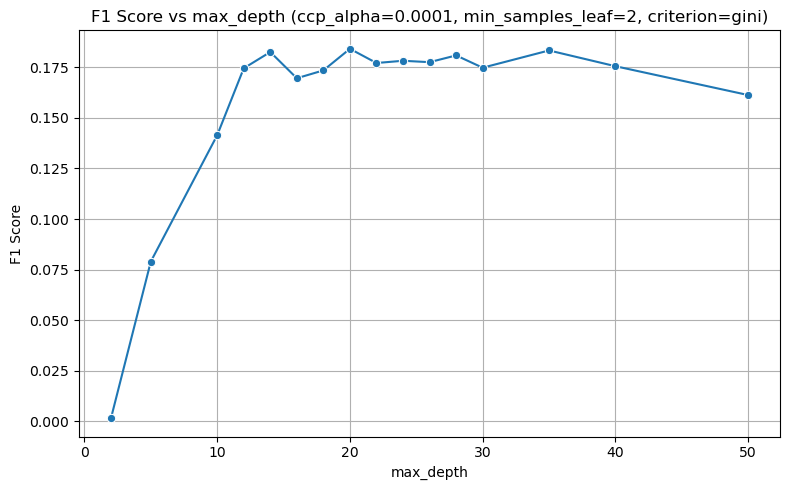

/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9260
Precision: 0.1818
Recall: 0.1633
F1 Score: 0.1720


/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9217
Precision: 0.1717
Recall: 0.1735
F1 Score: 0.1726


In [ ]:
filtered_runs = runs[
    (runs["params.cpp_alpha"] == 0.0001) &
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.max_depth")["metrics.f1-score_class_1"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.max_depth", y="metrics.f1-score_class_1", marker="o")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.title("F1 Score vs max_depth (ccp_alpha=0.0001, min_samples_leaf=2, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_pcb(14, 2, 0.0001, "gini", False)
utils.visualize_pcb(35, 2, 0.0001, "gini", False)

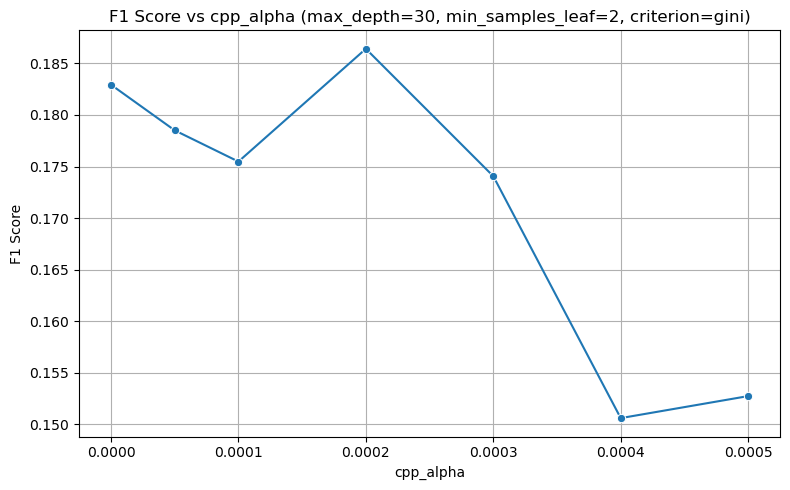

/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9529
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kretes/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

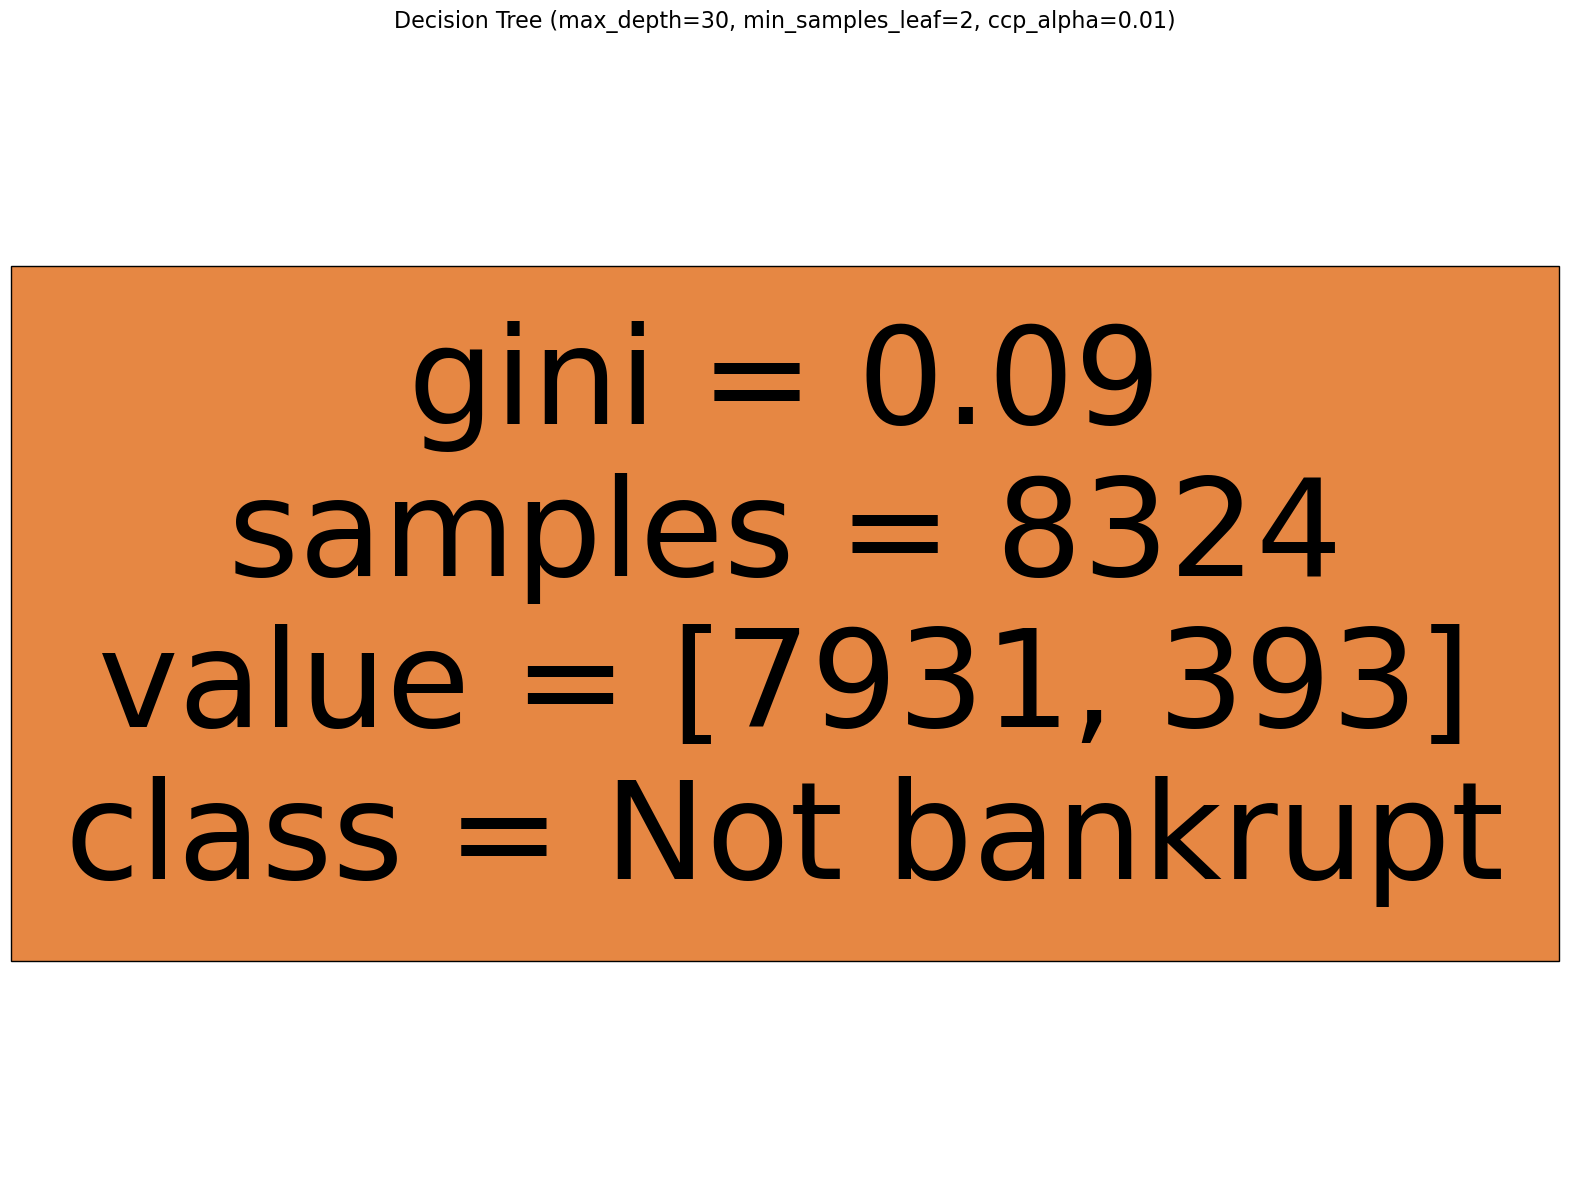

/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]


------------------------------
Overall Results
------------------------------
Accuracy: 0.9241
Precision: 0.1809
Recall: 0.1735
F1 Score: 0.1771


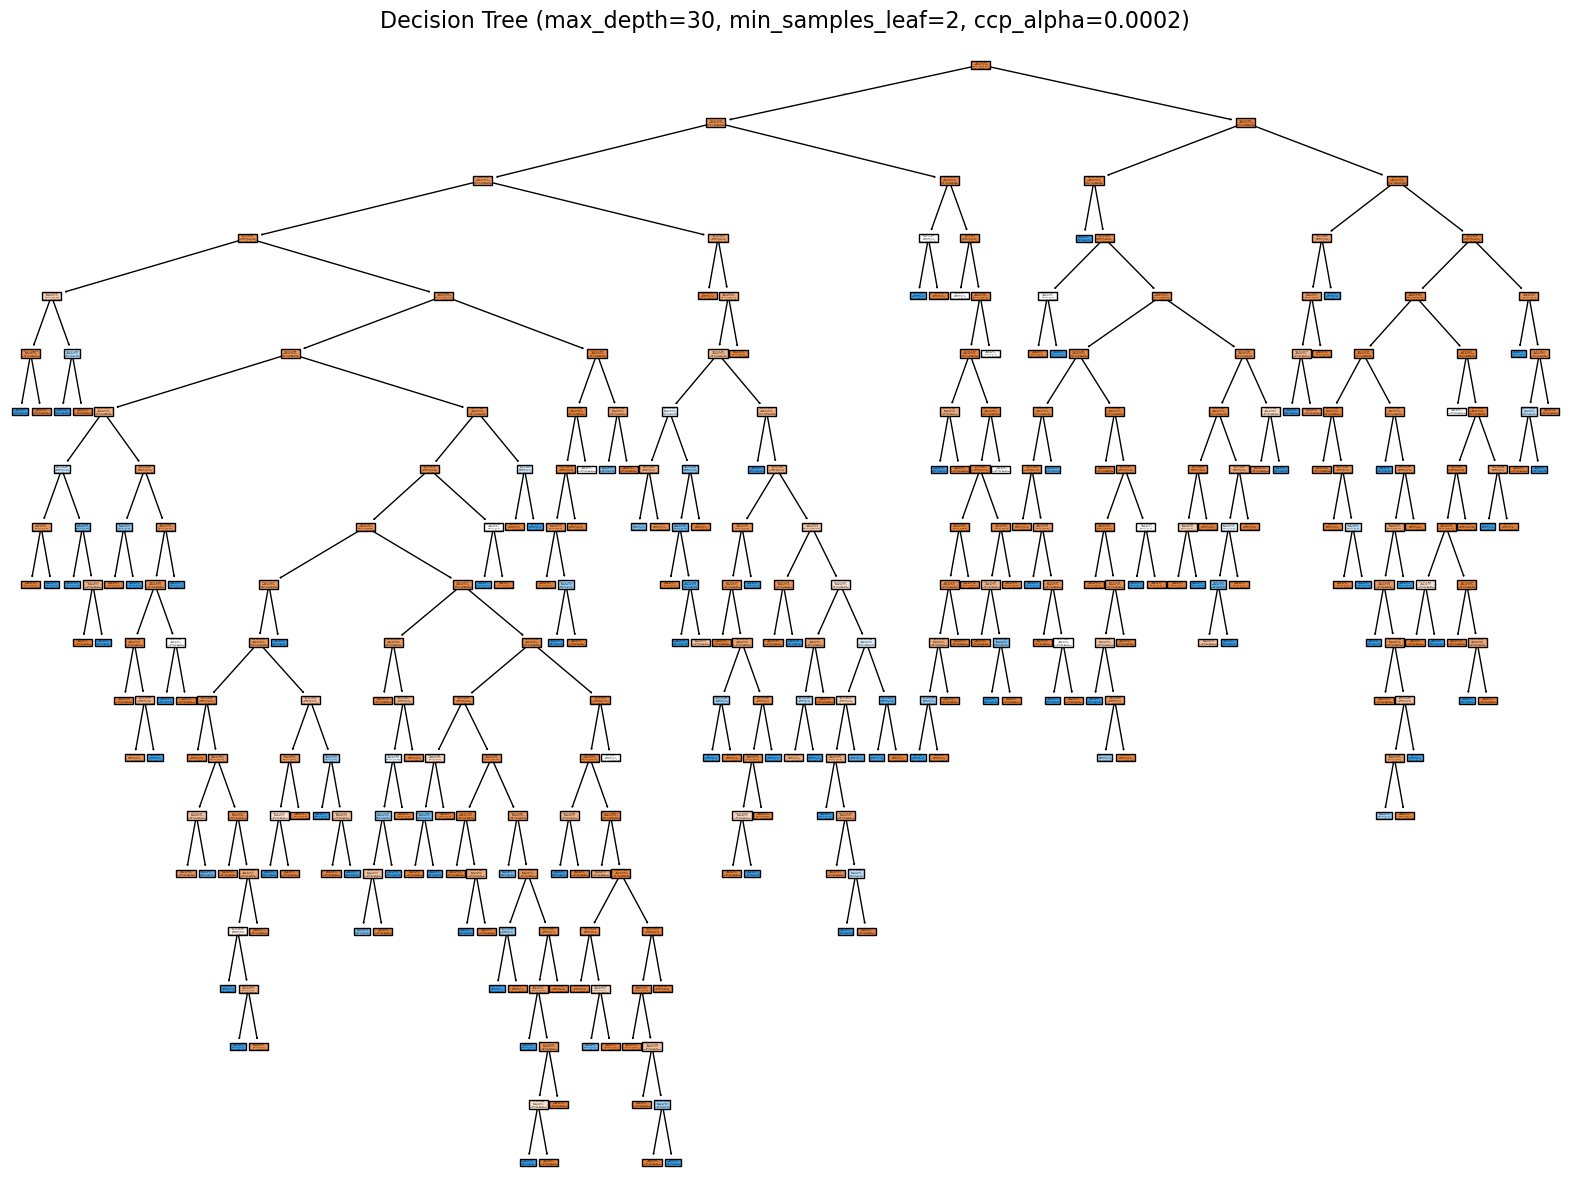

In [ ]:
filtered_runs = runs[
    (runs["params.max_depth"] == 30) &
    (runs["params.min_samples_leaf"] == 2) &
    (runs["params.criterion"] == "gini")
]

grouped = filtered_runs.groupby("params.cpp_alpha")["metrics.f1-score_class_1"].mean().reset_index()
grouped = grouped[grouped["params.cpp_alpha"] != 0.01]

plt.figure(figsize=(8, 5))
sns.lineplot(data=grouped, x="params.cpp_alpha", y="metrics.f1-score_class_1", marker="o")
plt.xlabel("cpp_alpha")
plt.ylabel("F1 Score")
plt.title("F1 Score vs cpp_alpha (max_depth=30, min_samples_leaf=2, criterion=gini)")
plt.grid(True)
plt.tight_layout()
plt.show()
utils.visualize_pcb(30, 2, 0.01, "gini")
utils.visualize_pcb(30, 2, 0.0002, "gini")

 - wraz ze spadkiem min_samples_leaf spada f1-score dla mniejszościowej klasy
 - drzewo decyzyjne sprawuje się zasadniczo dosyć słabo na tym problemie
 - dla max_depth < 12 kompletnie sobie nie radzi, ale powyżej zasadniczo wyniki są dosyć podobne
 - tylko dla bardzo niskich wartości ccp_alpha daje to rezultaty, jest to prawdopodobnie spowodowane tym jakie różnorodne przypadki tutaj są, włącznie z outlierami i tym jak mało firm zbankrutowanych jest do zbadania

# Cross validation tests
### Different number of folds

In [ ]:
dataset, X_train, X_test, y_train, y_test = utils.load_wine()
dtc = DecisionTreeClassifier(
                        criterion="gini",
                        max_depth=20,
                        min_samples_leaf=2,
                        ccp_alpha=0.01,
                    )

regular_results = []
stratified_results = []
n_iterations = 50

for n_splits in tqdm(range(2, 21)):
    regular_f1_scores = []
    regular_accuracy_scores = []
    regular_precision_scores = []
    regular_recall_scores = []

    stratified_f1_scores = []
    stratified_accuracy_scores = []
    stratified_precision_scores = []
    stratified_recall_scores = []

    for i in range(n_iterations):
        regular_metrics = utils.evaluate_model_cv(
            dtc, X_train, y_train, n_splits=n_splits, stratified=False
        )
        stratified_metrics = utils.evaluate_model_cv(
            dtc, X_train, y_train, n_splits=n_splits, stratified=True
        )

        regular_f1_scores.append(regular_metrics["f1-score"])
        regular_accuracy_scores.append(regular_metrics["accuracy"])
        regular_precision_scores.append(regular_metrics["precision"])
        regular_recall_scores.append(regular_metrics["recall"])

        stratified_f1_scores.append(stratified_metrics["f1-score"])
        stratified_accuracy_scores.append(stratified_metrics["accuracy"])
        stratified_precision_scores.append(stratified_metrics["precision"])
        stratified_recall_scores.append(stratified_metrics["recall"])

    regular_results.append(
        {
            "n_splits": n_splits,
            "accuracy": np.mean(regular_accuracy_scores),
            "precision": np.mean(regular_precision_scores),
            "recall": np.mean(regular_recall_scores),
            "f1-score": np.mean(regular_f1_scores),
            "type": "Regular",
        }
    )

    stratified_results.append(
        {
            "n_splits": n_splits,
            "accuracy": np.mean(stratified_accuracy_scores),
            "precision": np.mean(stratified_precision_scores),
            "recall": np.mean(stratified_recall_scores),
            "f1-score": np.mean(stratified_f1_scores),
            "type": "Stratified",
        }
    )

all_results = pd.DataFrame(regular_results + stratified_results)
regular_df = pd.DataFrame(regular_results)
stratified_df = pd.DataFrame(stratified_results)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [02:08<00:00,  6.76s/it]


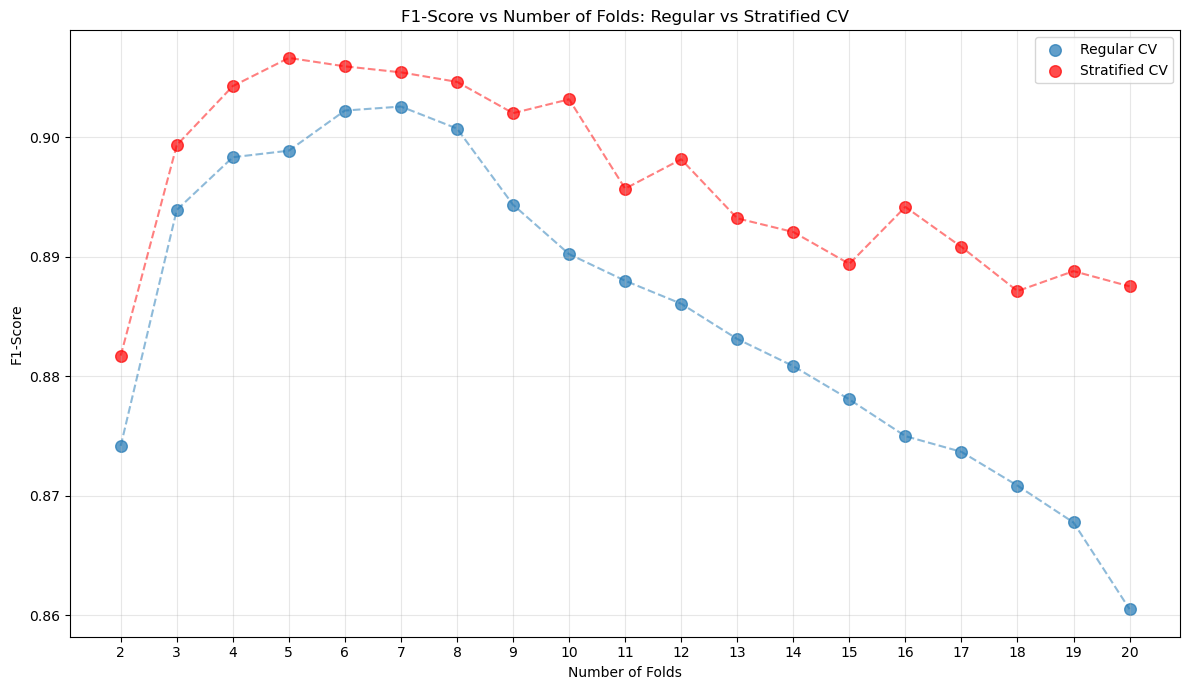

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(
    regular_df["n_splits"], regular_df["f1-score"], s=70, alpha=0.7, label="Regular CV"
)
plt.plot(regular_df["n_splits"], regular_df["f1-score"], "--", alpha=0.5)
plt.scatter(
    stratified_df["n_splits"],
    stratified_df["f1-score"],
    s=70,
    alpha=0.7,
    color="red",
    label="Stratified CV",
)
plt.plot(
    stratified_df["n_splits"], stratified_df["f1-score"], "--", alpha=0.5, color="red"
)
plt.xlabel("Number of Folds")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Number of Folds: Regular vs Stratified CV")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 21))
plt.tight_layout()
plt.show()

## Weight for PCB

In [ ]:
criterion = "gini"
max_depth = 30
min_samples_leaf = 2
ccp_alpha = 0.0002
(pcb, X_train, X_test, y_train, y_test) = utils.load_pcb()
n_steps = 20
proportions = np.linspace(0.5, 0.95, n_steps)
weight_results = []
n_iterations = 50

for proportion in tqdm(proportions):
    f1_scores = []
    
    for _ in range(n_iterations):
        weight_0 = 1 - proportion
        weight_1 = proportion
        
        dtc = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            ccp_alpha=ccp_alpha,
            class_weight={0: weight_0, 1: weight_1}
        )
        
        metrics = utils.evaluate_model_cv_pcb(dtc, X_train, y_train, n_splits=5, stratified=True)
        
        f1_scores.append(metrics["f1-score"][1])
    
    weight_results.append({
        "proportion": proportion,
        "f1-score": np.mean(f1_scores)
    })

weight_df = pd.DataFrame(weight_results)

/mnt/d/Politechnika/Master/ML/pwr-szt-ml-4/src/utils.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pcb.target_names = ["Not bankrupt", "Bankrupt"]
100%|██████████| 20/20 [45:31<00:00, 136.56s/it]


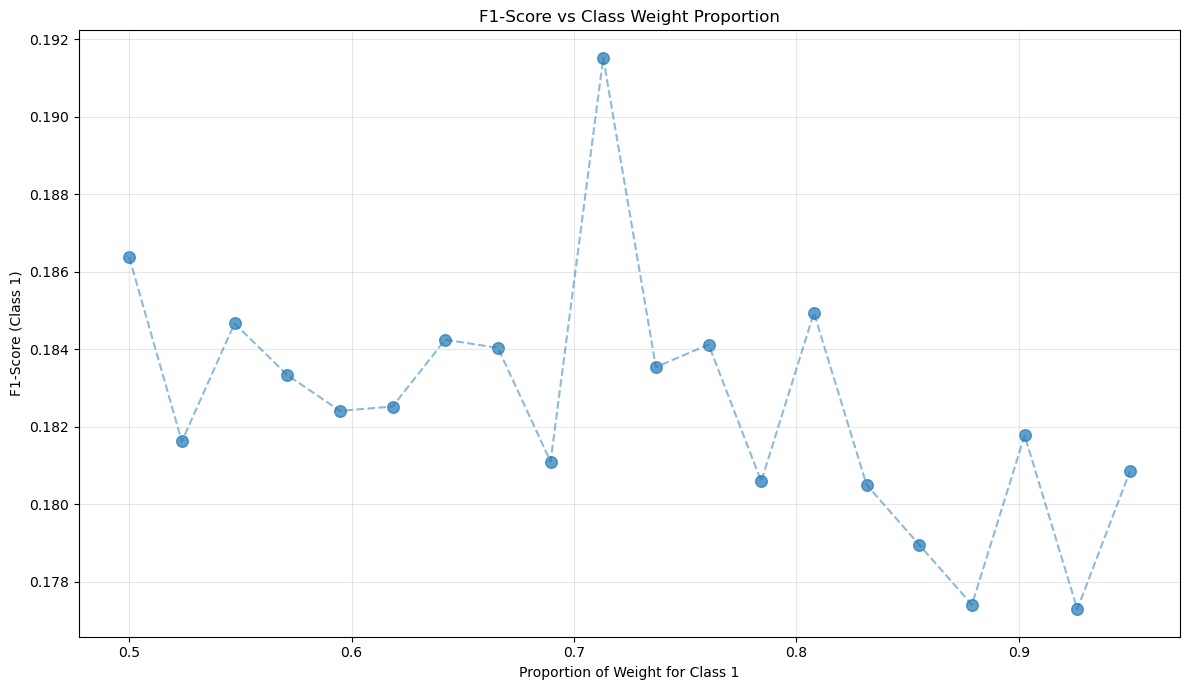

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(
    weight_df["proportion"], 
    weight_df["f1-score"], 
    s=70, 
    alpha=0.7
)
plt.plot(
    weight_df["proportion"], 
    weight_df["f1-score"], 
    "--", 
    alpha=0.5
)
plt.xlabel("Proportion of Weight for Class 1")
plt.ylabel("F1-Score (Class 1)")
plt.title("F1-Score vs Class Weight Proportion")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()